<a href="https://colab.research.google.com/github/SophiaKim100/NDSRP/blob/main/Olympic_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do Physical Traits Predict Olympic Medal Success?**
Can height, weight, and age be used to predict whether an Olympic athlete will win a medal?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import metrics
from sklearn.preprocessing import *

# **Below: Visualization/Analysis of Recent (last 45 years) Dataset**
General --> includes all seasons, all genders, all ages, all sports

## All Seasons

In [2]:
data = pd.read_csv('/content/athlete_events.csv')
all_df = pd.DataFrame(data)
all_df['Medalist'] = all_df['Medal'].notna().astype(int)
all_df['Season Encoded'] = all_df['Season'].map({'Summer': 1, 'Winter': 0})
all_df.drop(['Name', 'Team', 'NOC', 'Games', 'City', 'Event', 'Medal', 'Season'], axis = 1, inplace = True)
all_df = all_df[all_df['Year'] >= 1980]
all_df.drop_duplicates(inplace = True)
all_df.dropna(subset=['ID','Age', 'Sex','Height', 'Weight', 'Sport', 'Year', 'Season Encoded'], inplace=True)
all_df.head()

ID Sex   Age  Height  Weight  Year          Sport  Medalist  Season Encoded
0   1   M  24.0   180.0    80.0  1992     Basketball         0               1
1   2   M  23.0   170.0    60.0  2012           Judo         0               1
4   5   F  21.0   185.0    82.0  1988  Speed Skating         0               0
6   5   F  25.0   185.0    82.0  1992  Speed Skating         0               0
8   5   F  27.0   185.0    82.0  1994  Speed Skating         0               0

### **Visualizations**

In [ ]:
all_medalists_df = all_df[all_df['Medalist'] == 1]
all_non_medalists_df = all_df[all_df['Medalist'] == 0]

In [ ]:
all_grouped_height = all_df.groupby('Medalist')[['Height']].describe()
all_grouped_height

Height                                                          
            count        mean        std    min    25%    50%    75%    max
Medalist                                                                   
0         92248.0  176.507133  10.547702  127.0  169.0  177.0  183.0  226.0
1         19213.0  178.168428  11.294090  136.0  170.0  178.0  185.0  223.0

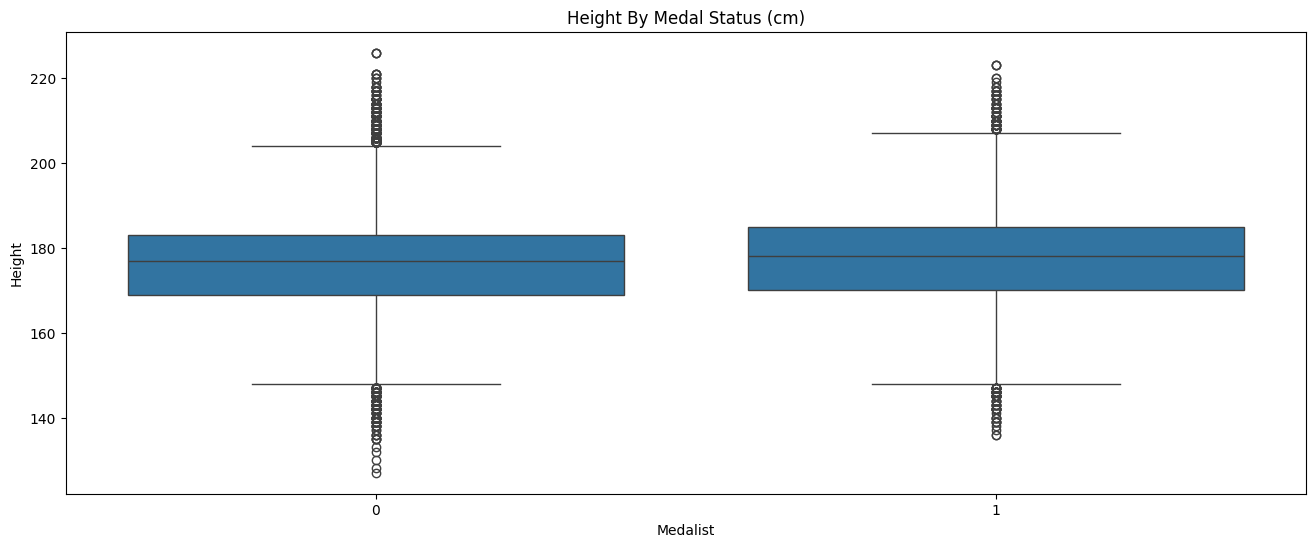

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Height', x='Medalist', data=all_df)
plt.title("Height By Medal Status (cm)")
plt.show()

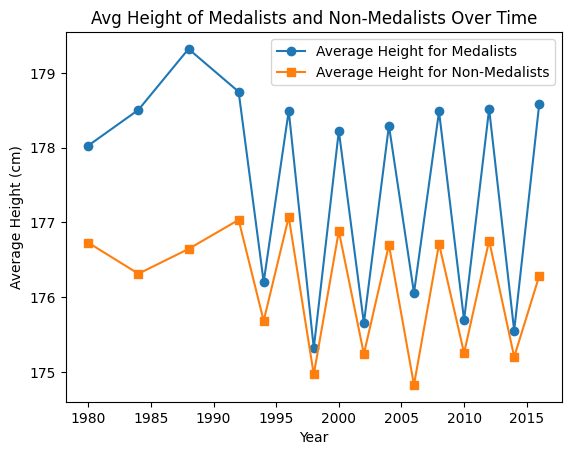

In [ ]:
yearly_avg_height_medalists = all_medalists_df.groupby('Year')[['Height']].mean().reset_index()
yearly_avg_height_non_medalists = all_non_medalists_df.groupby('Year')[['Height']].mean().reset_index()

plt.plot(yearly_avg_height_medalists['Year'], yearly_avg_height_medalists['Height'], label = 'Average Height for Medalists', marker='o')
plt.plot(yearly_avg_height_non_medalists['Year'], yearly_avg_height_non_medalists['Height'], label = 'Average Height for Non-Medalists', marker='s')

plt.title('Avg Height of Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')
plt.legend()
plt.show()


In [ ]:
all_grouped_weight = all_df.groupby('Medalist')[['Weight']].describe()
all_grouped_weight

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         92248.0  72.017935  15.220753  25.0  61.0  70.0  81.0  214.0
1         19213.0  74.381486  15.647860  28.0  63.0  73.0  84.0  175.0

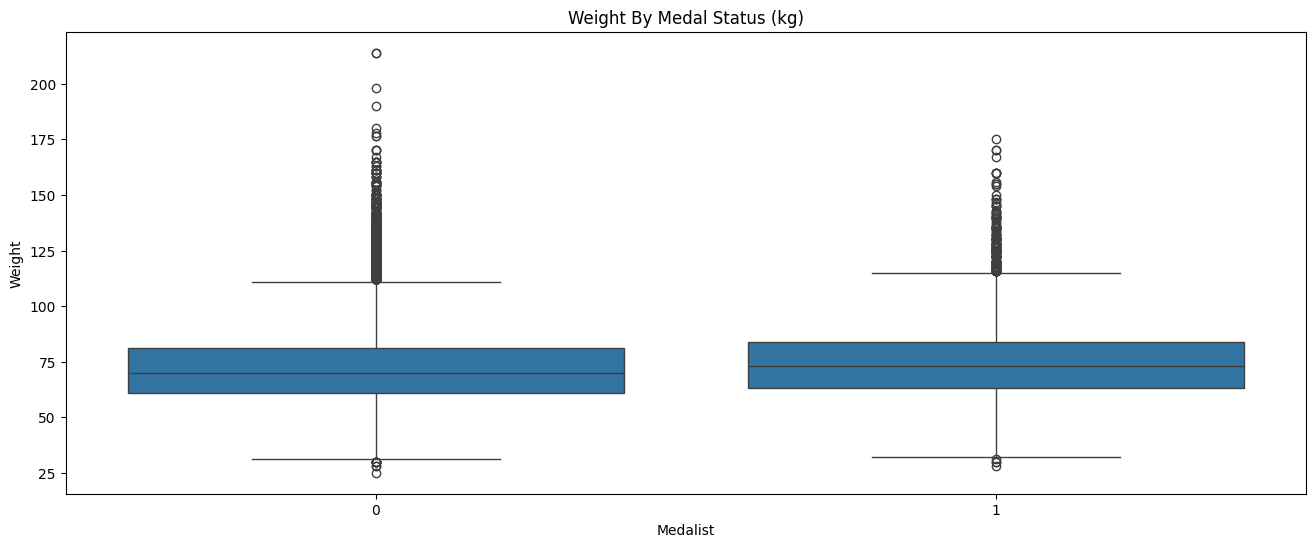

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Weight', x='Medalist', data=all_df)
plt.title("Weight By Medal Status (kg)")
plt.show()

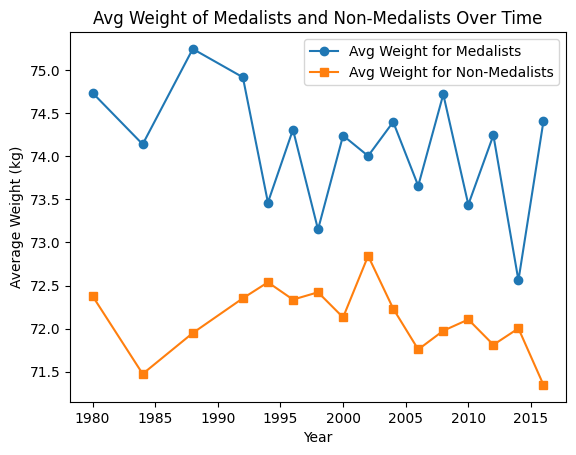

In [ ]:
yearly_avg_weight_medalists = all_medalists_df.groupby('Year')[['Weight']].mean().reset_index()
yearly_avg_weight_non_medalists = all_non_medalists_df.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(yearly_avg_weight_medalists['Year'], yearly_avg_weight_medalists['Weight'], label = 'Avg Weight for Medalists', marker='o')
plt.plot(yearly_avg_weight_non_medalists['Year'], yearly_avg_weight_non_medalists['Weight'], label = 'Avg Weight for Non-Medalists', marker='s')

plt.title('Avg Weight of Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Average Weight (kg)')
plt.legend()
plt.show()

In [ ]:
all_grouped_age = all_df.groupby('Medalist')[['Age']].describe()
all_grouped_age

Age                                                   
            count       mean       std   min   25%   50%   75%   max
Medalist                                                            
0         92248.0  25.571449  5.347983  12.0  22.0  25.0  28.0  71.0
1         19213.0  25.780930  4.941659  13.0  22.0  25.0  28.0  61.0

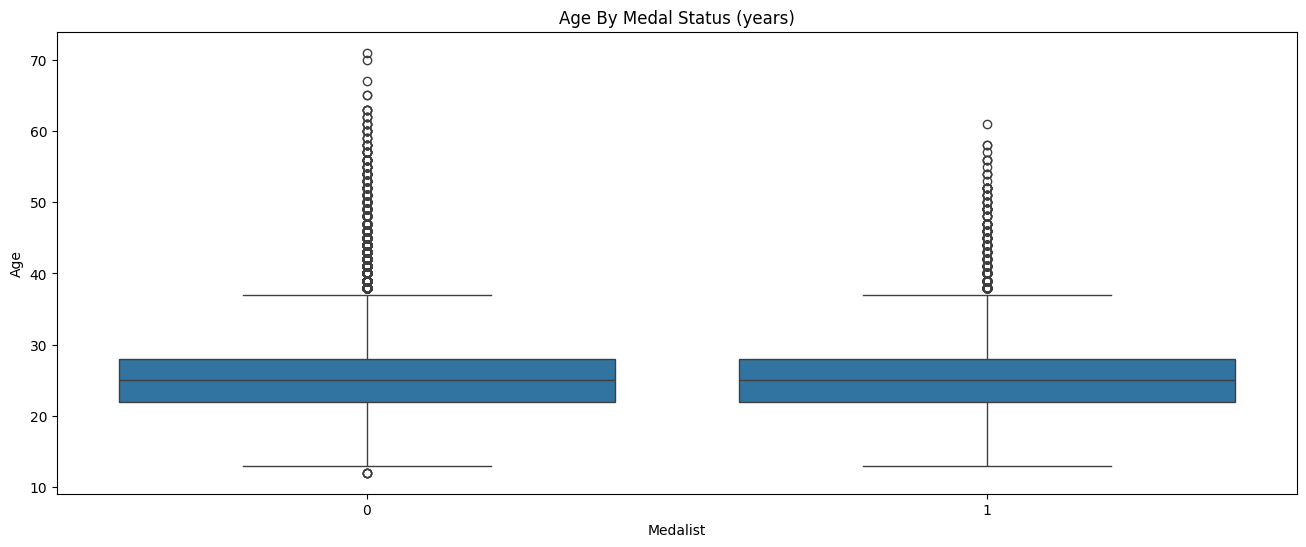

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Age', x='Medalist', data=all_df)
plt.title("Age By Medal Status (years)")
plt.show()

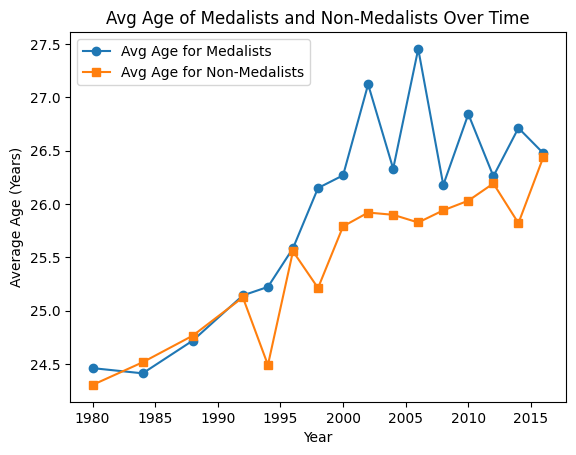

In [ ]:
yearly_avg_age_medalists = all_medalists_df.groupby('Year')[['Age']].mean().reset_index()
yearly_avg_age_non_medalists = all_non_medalists_df.groupby('Year')[['Age']].mean().reset_index()

plt.plot(yearly_avg_age_medalists['Year'], yearly_avg_age_medalists['Age'], label = 'Avg Age for Medalists', marker='o')
plt.plot(yearly_avg_age_non_medalists['Year'], yearly_avg_age_non_medalists['Age'], label = 'Avg Age for Non-Medalists', marker='s')

plt.title('Avg Age of Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Average Age (Years)')
plt.legend()
plt.show()

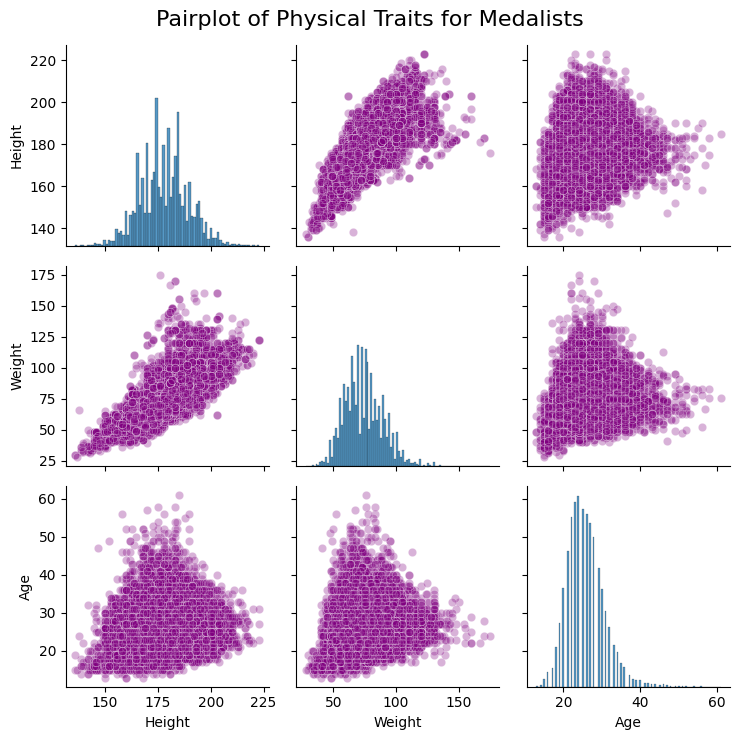

In [ ]:
sns.pairplot(all_medalists_df[['Height', 'Weight', 'Age']],  diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for Medalists", fontsize=16)
plt.tight_layout()
plt.show()

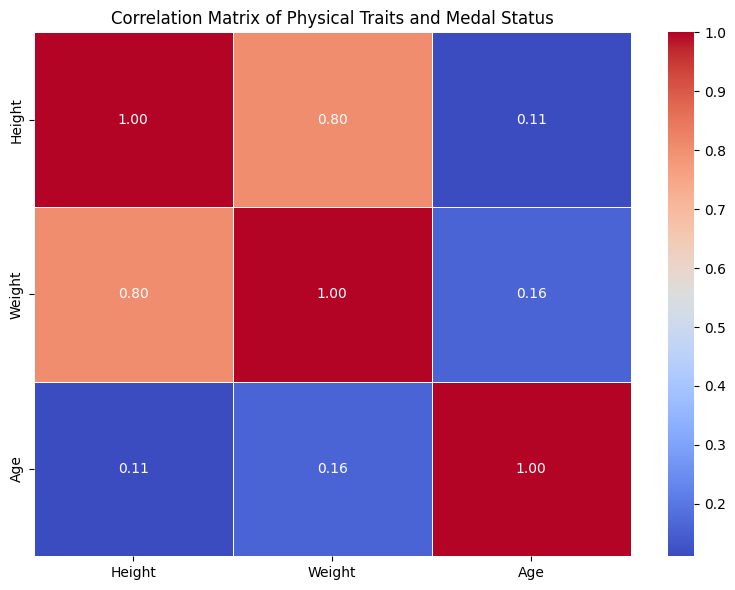

In [ ]:
# Select numeric columns for correlation
all_traits = all_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = all_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits and Medal Status")
plt.tight_layout()
plt.show()

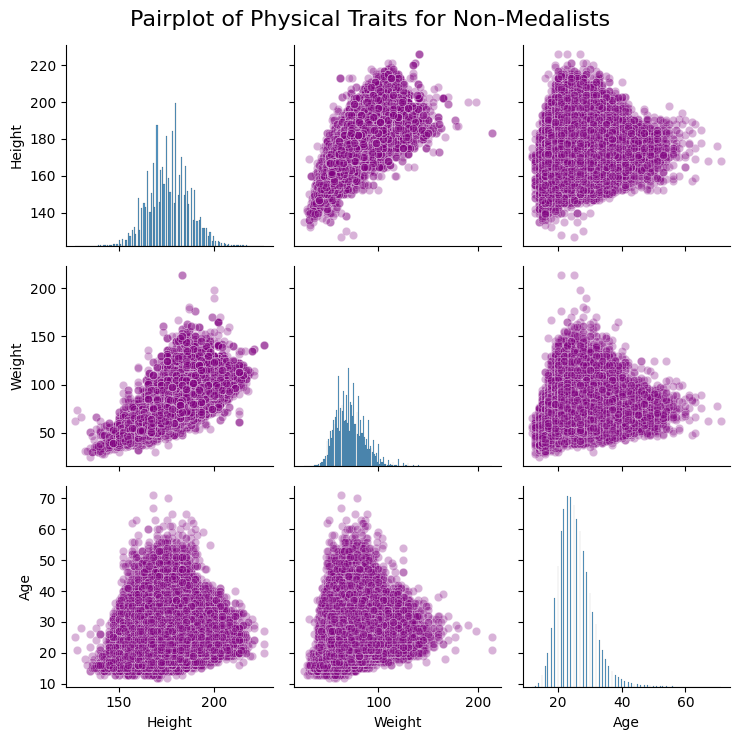

In [ ]:
sns.pairplot(all_non_medalists_df[['Height', 'Weight', 'Age']],diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'} )
plt.suptitle("Pairplot of Physical Traits for Non-Medalists", fontsize=16)
plt.tight_layout()
plt.show()

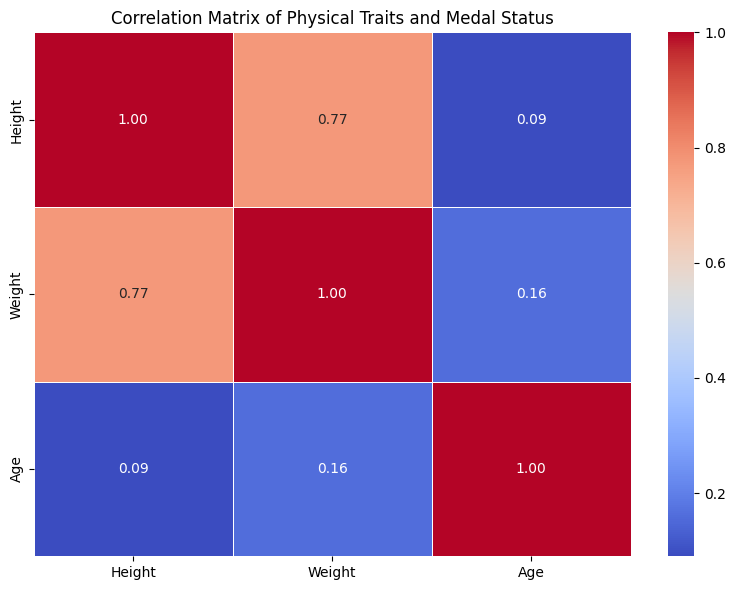

In [ ]:
# Select numeric columns for correlation
all_traits2 = all_non_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = all_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits and Medal Status")
plt.tight_layout()
plt.show()

### **Encode & Feature Prep**

In [ ]:
features = all_df[['Height', 'Age', 'Weight','Season Encoded']]
label = all_df['Medalist']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 42)

In [ ]:
#create a standardized version of the training and testing data
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [ ]:
#create a normalized version of the training and testing data
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

### Unscaled Data Test

In [ ]:
#test on unscaled training data
model_unscaled = KNeighborsClassifier(n_neighbors=5)
model_unscaled.fit(X_train, y_train)
pred_unscaled = model_unscaled.predict(X_test)
print(accuracy_score(y_test, pred_unscaled))

0.7978289149060244


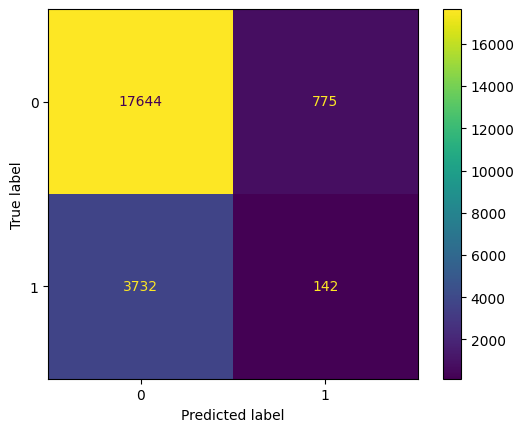

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)
plt.show()

/tmp/ipython-input-153-2725526517.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


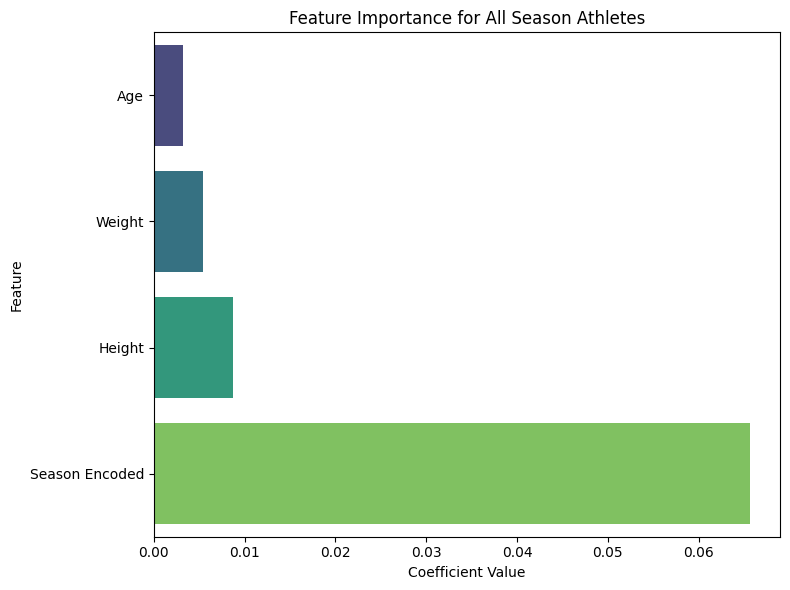

In [ ]:
# Train logistic regression
lr_model1 = LogisticRegression(max_iter=1000)
lr_model1.fit(X_train, y_train)

# Extract coefficients
coeffs = lr_model1.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Season Athletes")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Standaradized Data Test

In [ ]:
#Test on standardized training data
model_std = KNeighborsClassifier(n_neighbors=5)
X_scaled = std_scaler.fit_transform(features)
model_std.fit(X_train_std, y_train)
pred_std =  model_std.predict(X_test_std)
print(accuracy_score(y_test, pred_std))

0.7994886287175347


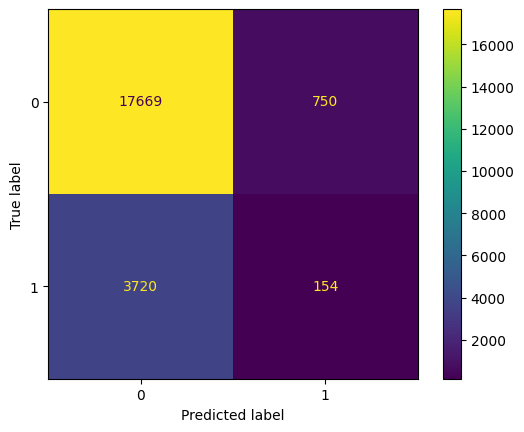

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_std, display_labels = model_std.classes_)
plt.show()

/tmp/ipython-input-170-2062751087.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


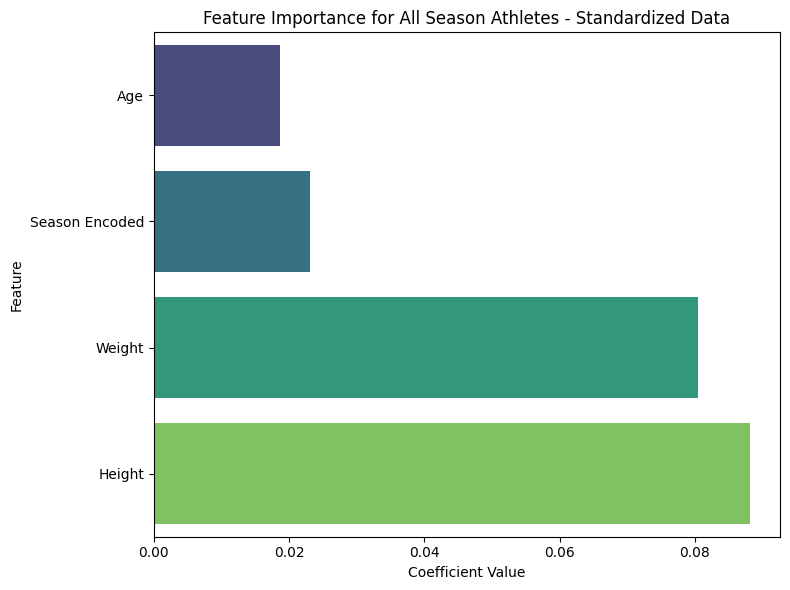

In [ ]:
# Train logistic regression
lr_model2 = LogisticRegression(max_iter=1000)
lr_model2.fit(X_scaled, label)

# Extract coefficients
coeffs = lr_model2.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Season Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Normalized Data Test

In [ ]:
#Test on normalized data
model_norm = KNeighborsClassifier(n_neighbors=5)
X_norm = norm_scaler.fit_transform(features)
model_norm.fit(X_train_norm, y_train)
pred_norm = model_norm.predict(X_test_norm)
print(accuracy_score(y_test, pred_norm))

0.7991746288072489


In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_norm, display_labels = model_norm.classes_)
plt.show()

/tmp/ipython-input-173-3230799002.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


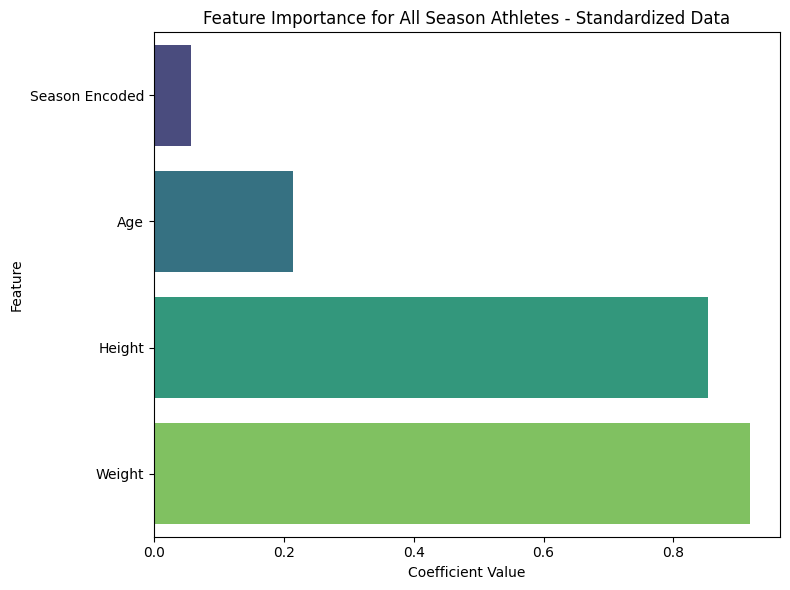

In [ ]:
# Train logistic regression
lr_model3 = LogisticRegression(max_iter=1000)
lr_model3.fit(X_norm, label)

# Extract coefficients
coeffs = lr_model3.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Season Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Analysis

## Winter Season

In [3]:
all_winter_df = all_df[all_df['Season Encoded'] == 0]
all_winter_df.reset_index(drop=True, inplace=True)
all_winter_df.head()

ID Sex   Age  Height  Weight  Year                 Sport  Medalist  \
0   5   F  21.0   185.0    82.0  1988         Speed Skating         0   
1   5   F  25.0   185.0    82.0  1992         Speed Skating         0   
2   5   F  27.0   185.0    82.0  1994         Speed Skating         0   
3   6   M  31.0   188.0    75.0  1992  Cross Country Skiing         0   
4   6   M  33.0   188.0    75.0  1994  Cross Country Skiing         0   

   Season Encoded  
0               0  
1               0  
2               0  
3               0  
4               0

### Visualization

In [4]:
all_winter_medalists = all_winter_df[all_winter_df['Medalist'] == 1]
all_winter_non_medalists = all_winter_df[all_winter_df['Medalist'] == 0]

In [ ]:
aw_grouped_height = all_winter_df.groupby('Medalist')[['Height']].describe()
aw_grouped_height

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Height', x='Medalist', data=all_winter_df)
plt.title("Height By Medal Status for All Athletes (cm)")
plt.show()

In [ ]:
aw_grouped_weight = all_winter_df.groupby('Medalist')[['Weight']].describe()
aw_grouped_weight

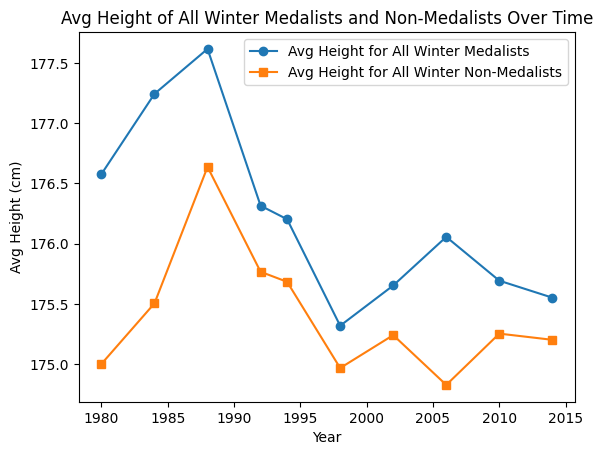

In [ ]:
aw_yearly_avg_height_medalists = all_winter_medalists.groupby('Year')[['Height']].mean().reset_index()
aw_yearly_avg_height_non_medalists = all_winter_non_medalists.groupby('Year')[['Height']].mean().reset_index()

plt.plot(aw_yearly_avg_height_medalists['Year'], aw_yearly_avg_height_medalists['Height'], label = 'Avg Height for All Winter Medalists', marker='o')
plt.plot(aw_yearly_avg_height_non_medalists['Year'], aw_yearly_avg_height_non_medalists['Height'], label = 'Avg Height for All Winter Non-Medalists', marker='s')

plt.title('Avg Height of All Winter Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Height (cm)')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Weight', x='Medalist', data=all_winter_df)
plt.title("Weight By Medal Status for All Athletes (kg)")
plt.show()

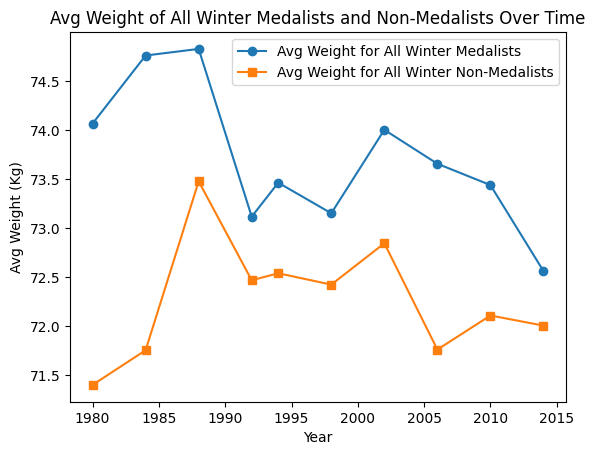

In [ ]:
aw_yearly_avg_weight_medalists = all_winter_medalists.groupby('Year')[['Weight']].mean().reset_index()
aw_yearly_avg_weight_non_medalists = all_winter_non_medalists.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(aw_yearly_avg_weight_medalists['Year'], aw_yearly_avg_weight_medalists['Weight'], label = 'Avg Weight for All Winter Medalists', marker='o')
plt.plot(aw_yearly_avg_weight_non_medalists['Year'], aw_yearly_avg_weight_non_medalists['Weight'], label = "Avg Weight for All Winter Non-Medalists", marker = 's')

plt.title('Avg Weight of All Winter Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Weight (Kg)')
plt.legend()
plt.show()

In [ ]:
aw_grouped_age = all_winter_df.groupby('Medalist')[['Age']].describe()
aw_grouped_age

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(y='Age', x='Medalist', data=all_winter_df)
plt.title("Age By Medal Status for All Athletes (years)")
plt.show()

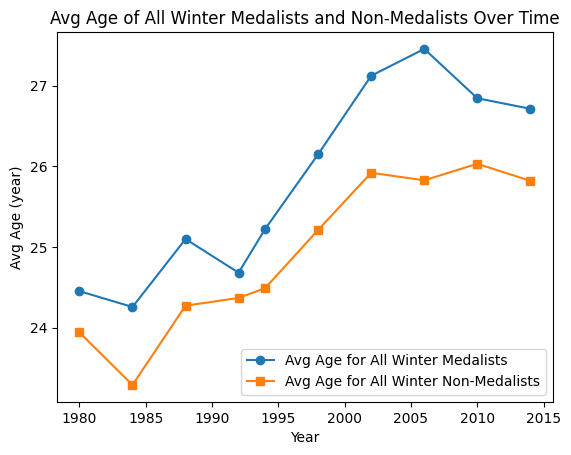

In [ ]:
aw_yearly_avg_age_medalists = all_winter_medalists.groupby('Year')[['Age']].mean().reset_index()
aw_yearly_avg_age_non_medalists = all_winter_non_medalists.groupby('Year')[['Age']].mean().reset_index()

plt.plot(aw_yearly_avg_age_medalists['Year'], aw_yearly_avg_age_medalists['Age'], label = 'Avg Age for All Winter Medalists', marker='o')
plt.plot(aw_yearly_avg_age_non_medalists['Year'], aw_yearly_avg_age_non_medalists['Age'], label = "Avg Age for All Winter Non-Medalists", marker = 's')

plt.title('Avg Age of All Winter Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Age (year)')
plt.legend()
plt.show()

In [ ]:
sns.pairplot(all_winter_medalists[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for All Winter Medalists")
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
aw_traits = all_winter_medalists[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = aw_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits for All Winter Medalists")
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(all_winter_non_medalists[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for All Winter Non-Medalists")
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
aw_traits2 = all_winter_non_medalists[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = aw_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits for All Winter Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Predictions

In [5]:
aw_features = all_winter_df[['Height', 'Age', 'Weight']]
aw_label = all_winter_df['Medalist']

In [6]:
X_test_aw, X_train_aw, y_test_aw, y_train_aw = train_test_split(aw_features, aw_label, test_size=0.2, random_state=42)

In [7]:
std_scaler = StandardScaler()
X_train_aw_std = std_scaler.fit_transform(X_train_aw)
X_test_aw_std = std_scaler.transform(X_test_aw)

In [8]:
norm_scaler = MinMaxScaler()
X_train_aw_norm = norm_scaler.fit_transform(X_train_aw)
X_test_aw_norm = norm_scaler.transform(X_test_aw)

###Unscaled Data Test

In [ ]:
model_unscaled_aw = KNeighborsClassifier(n_neighbors=5)
model_unscaled_aw.fit(X_train_aw, y_train_aw)
pred_unscaled_aw = model_unscaled_aw.predict(X_test_aw)
print(accuracy_score(y_test_aw, pred_unscaled_aw))

0.8130241423125795


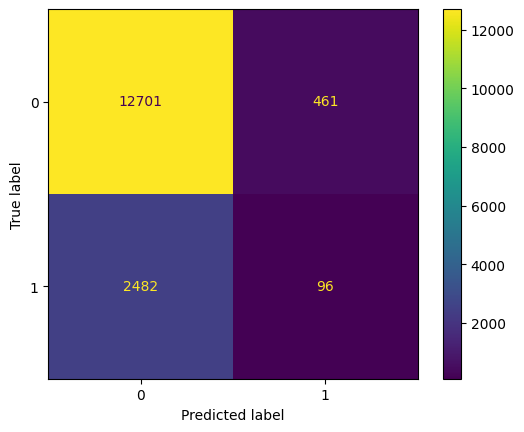

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_aw, pred_unscaled_aw, display_labels = model_unscaled_aw.classes_)
plt.show()

/tmp/ipython-input-13-4273629131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


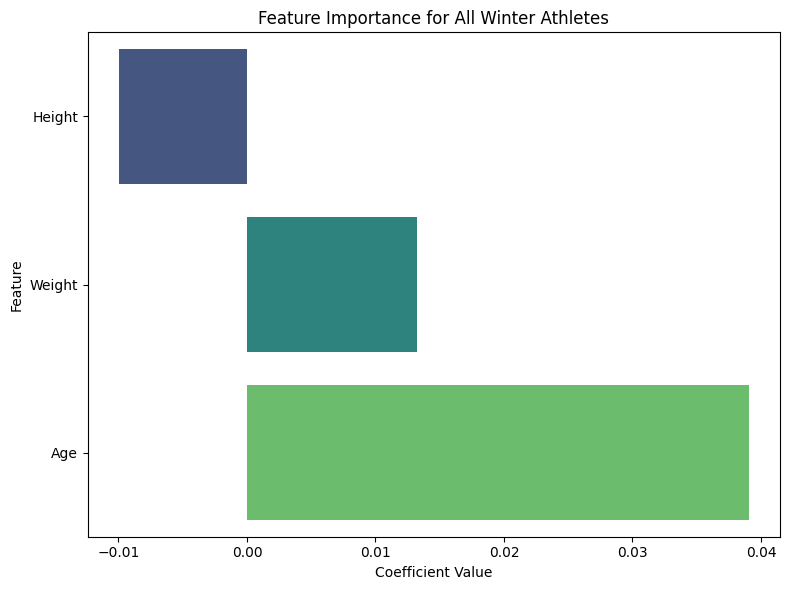

In [ ]:
# Train logistic regression
lr_model4 = LogisticRegression(max_iter=1000)
lr_model4.fit(X_train_aw, y_train_aw)

# Extract coefficients
coeffs = lr_model4.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_aw.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Winter Athletes")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Standardized Data Test

In [ ]:
model_std_aw = KNeighborsClassifier(n_neighbors=5)
model_std_aw.fit(X_train_aw_std, y_train_aw)
pred_std_aw = model_std_aw.predict(X_test_aw_std)
print(accuracy_score(y_test_aw, pred_std_aw))

0.8119440914866582


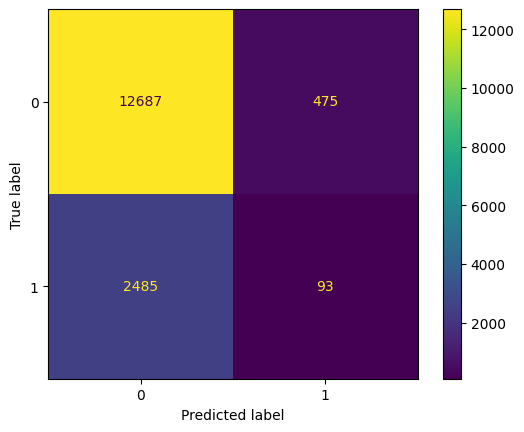

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_aw, pred_std_aw, display_labels = model_std_aw.classes_)
plt.show()

/tmp/ipython-input-21-3661822010.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


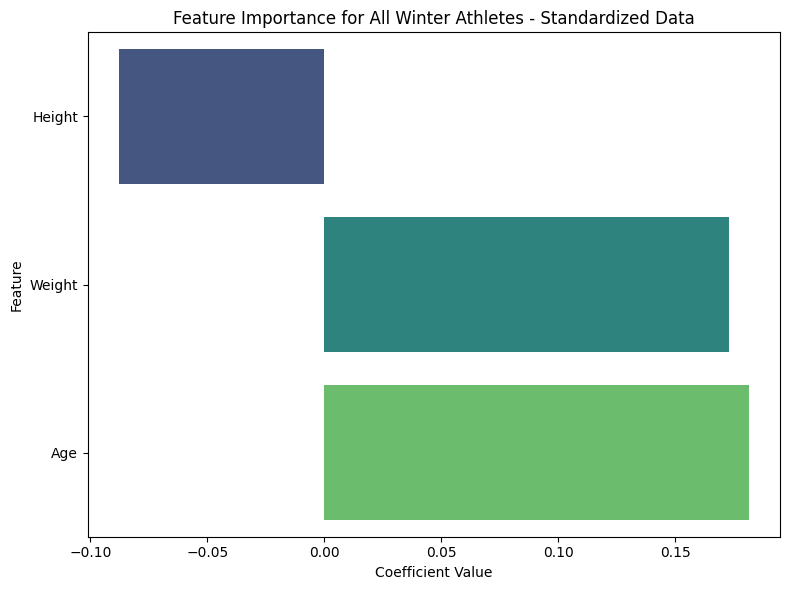

In [ ]:
# Train logistic regression
lr_model5 = LogisticRegression(max_iter=1000)
lr_model5.fit(X_train_aw_std, y_train_aw)

# Extract coefficients
coeffs = lr_model5.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_aw.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Winter Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Normalized Data Test

In [ ]:
model_norm_aw = KNeighborsClassifier(n_neighbors=5)
model_norm_aw.fit(X_train_aw_norm, y_train_aw)
pred_norm_aw = model_norm_aw.predict(X_test_aw_norm)
print(accuracy_score(y_test_aw, pred_norm_aw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_aw, pred_norm_aw, display_labels = model_norm_aw.classes_)
plt.show()

/tmp/ipython-input-24-1030875604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


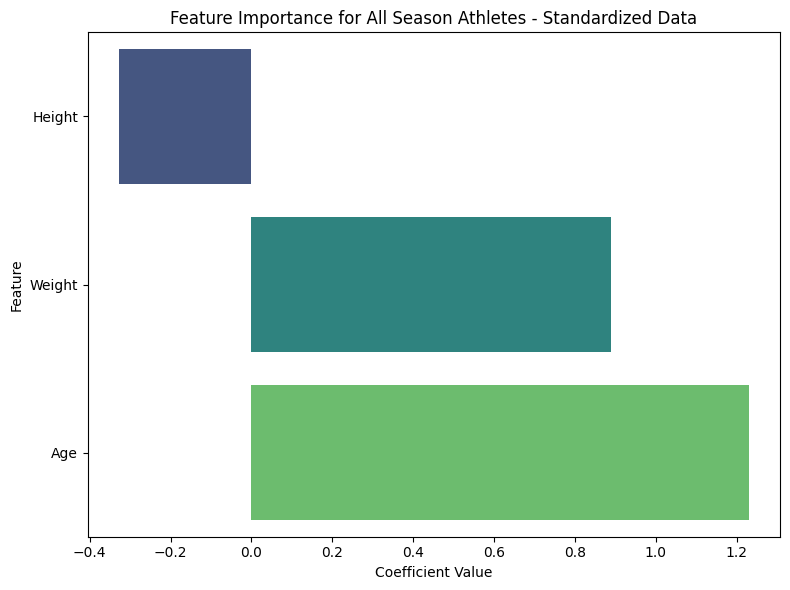

In [ ]:
# Train logistic regression
lr_model6 = LogisticRegression(max_iter=1000)
lr_model6.fit(X_train_aw_norm, y_train_aw)

# Extract coefficients
coeffs = lr_model6.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_aw.columns.tolist()).sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Season Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Analysis

## Summer Season

In [9]:
all_summer_df = all_df[all_df['Season Encoded'] == 1]
all_summer_df.reset_index(drop=True, inplace=True)
all_summer_df.head()

ID Sex   Age  Height  Weight  Year       Sport  Medalist  Season Encoded
0   1   M  24.0   180.0    80.0  1992  Basketball         0               1
1   2   M  23.0   170.0    60.0  2012        Judo         0               1
2  12   M  31.0   172.0    70.0  2000   Badminton         0               1
3  13   F  30.0   159.0    55.5  1996     Sailing         0               1
4  13   F  34.0   159.0    55.5  2000     Sailing         0               1

### Visualization

In [10]:
as_medalists = all_summer_df[all_summer_df['Medalist'] == 1]
as_non_medalists = all_summer_df[all_summer_df['Medalist'] == 0]

In [ ]:
as_grouped_height = all_summer_df.groupby('Medalist')[['Height']].describe()
as_grouped_height

Height                                                          
            count        mean        std    min    25%    50%    75%    max
Medalist                                                                   
0         75788.0  176.764277  10.860394  127.0  169.0  177.0  184.0  226.0
1         15997.0  178.600363  11.674730  136.0  170.0  178.0  186.0  223.0

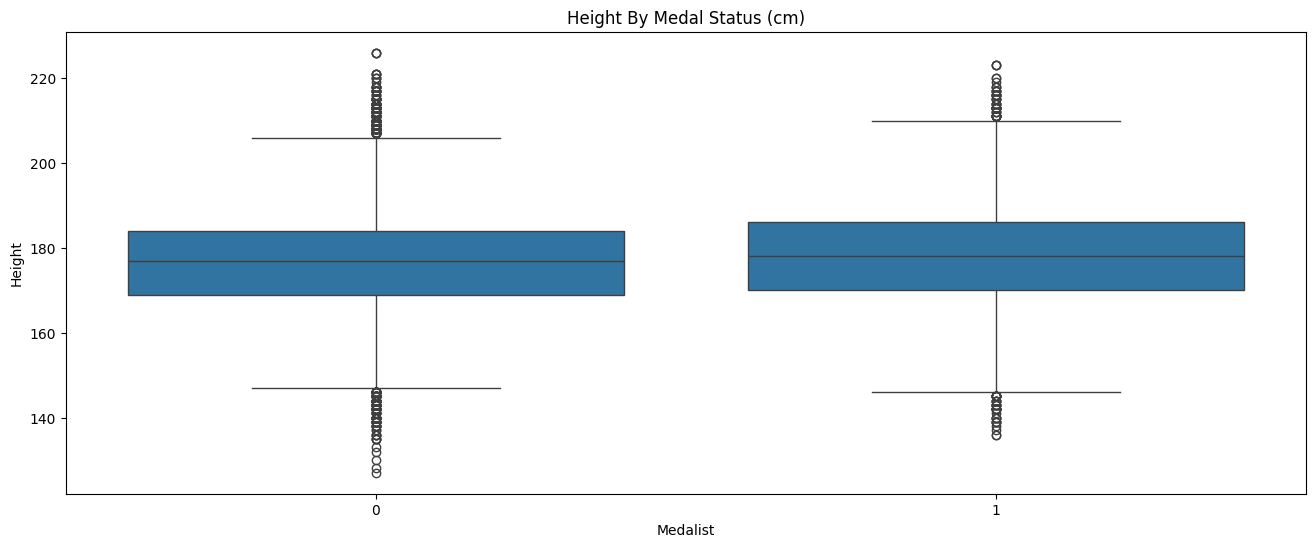

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Height', data=all_summer_df)
plt.title("Height By Medal Status for All Summer Athletes (cm)")
plt.show()

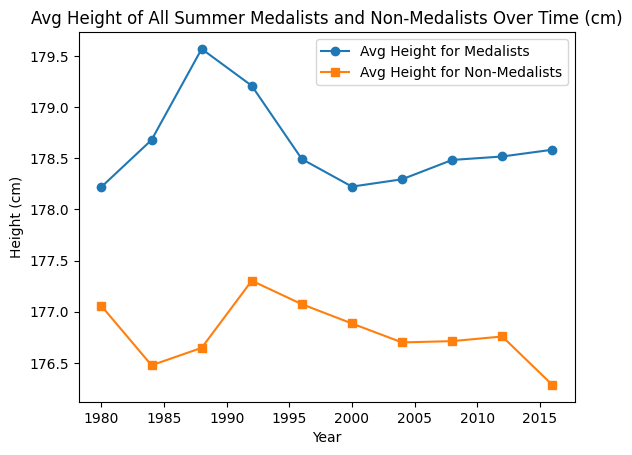

In [ ]:
as_yearly_avg_height_medalists = as_medalists.groupby('Year')[['Height']].mean().reset_index()
as_yearly_avg_height_non_medalists = as_non_medalists.groupby('Year')[['Height']].mean().reset_index()

plt.plot(as_yearly_avg_height_medalists['Year'], as_yearly_avg_height_medalists['Height'], label = 'Avg Height for Medalists', marker = 'o')
plt.plot(as_yearly_avg_height_non_medalists['Year'], as_yearly_avg_height_non_medalists['Height'], label = 'Avg Height for Non-Medalists', marker = 's')

plt.title('Avg Height of All Summer Medalists and Non-Medalists Over Time (cm)')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.legend()
plt.show()

In [ ]:
as_grouped_weight = all_summer_df.groupby('Medalist')[['Weight']].describe()
as_grouped_weight

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         75788.0  71.962897  15.619608  25.0  60.0  70.0  80.0  214.0
1         15997.0  74.549416  16.039398  28.0  63.0  73.0  84.0  175.0

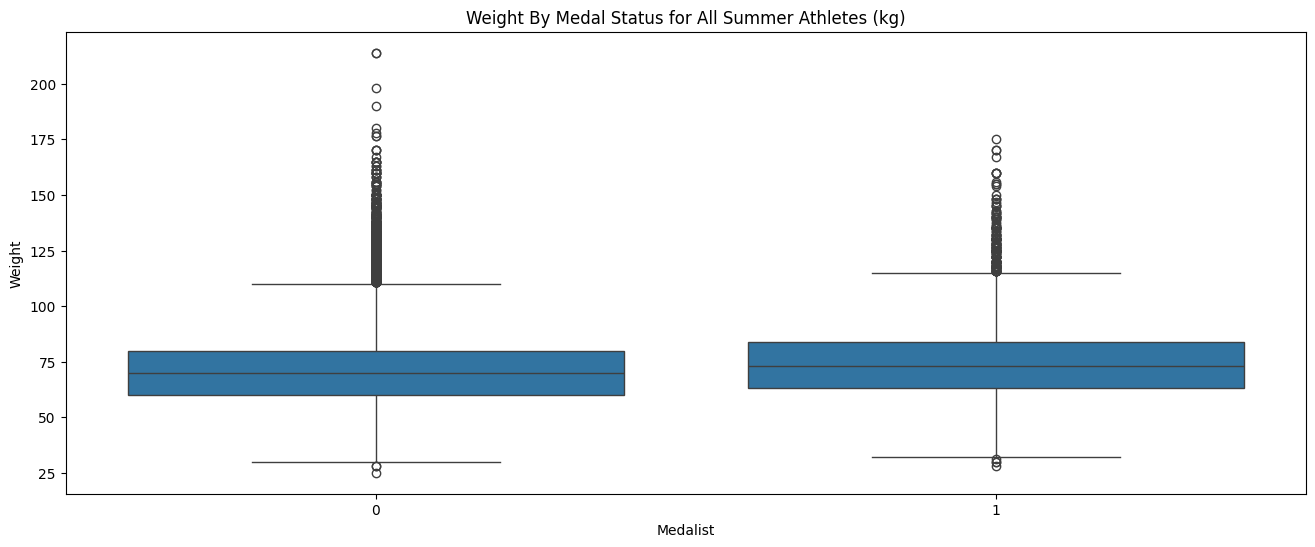

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Weight', data = all_summer_df)
plt.title("Weight By Medal Status for All Summer Athletes (kg)")
plt.show()

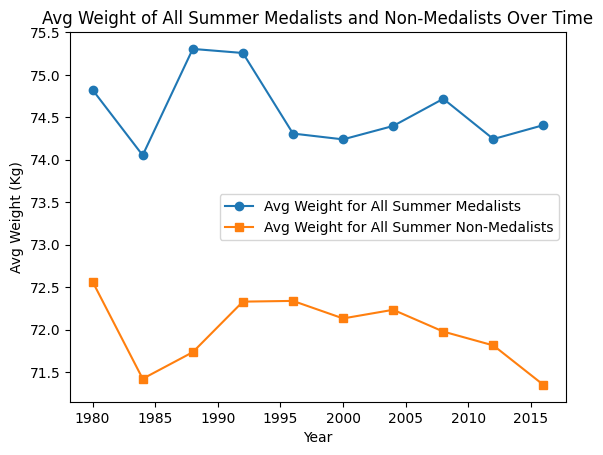

In [ ]:
as_yearly_avg_weight_medalists = as_medalists.groupby('Year')[['Weight']].mean().reset_index()
as_yearly_avg_weight_non_medalists = as_non_medalists.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(as_yearly_avg_weight_medalists['Year'], as_yearly_avg_weight_medalists['Weight'], label = 'Avg Weight for All Summer Medalists', marker='o')
plt.plot(as_yearly_avg_weight_non_medalists['Year'], as_yearly_avg_weight_non_medalists['Weight'], label = "Avg Weight for All Summer Non-Medalists", marker = 's')

plt.title('Avg Weight of All Summer Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Weight (Kg)')
plt.legend()
plt.show()

In [ ]:
as_grouped_age = all_summer_df.groupby('Medalist')[['Age']].describe()
as_grouped_age

Age                                                   
            count       mean       std   min   25%   50%   75%   max
Medalist                                                            
0         75788.0  25.649377  5.462523  12.0  22.0  25.0  29.0  71.0
1         15997.0  25.701882  4.975077  13.0  22.0  25.0  28.0  61.0

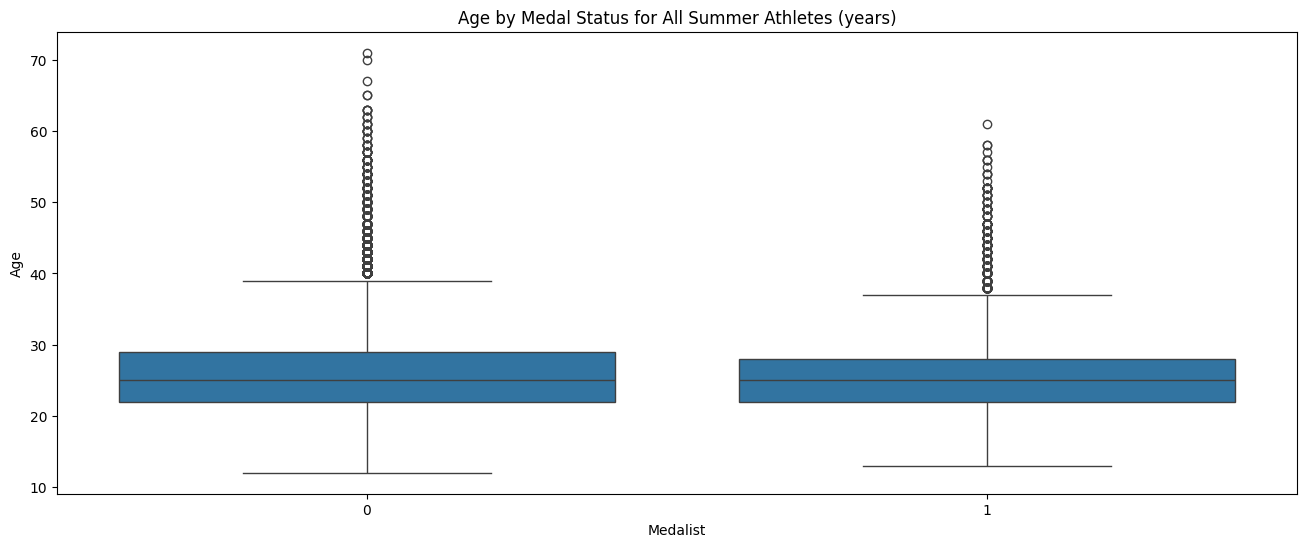

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Age', data= all_summer_df)
plt.title("Age by Medal Status for All Summer Athletes (years)")
plt.show()

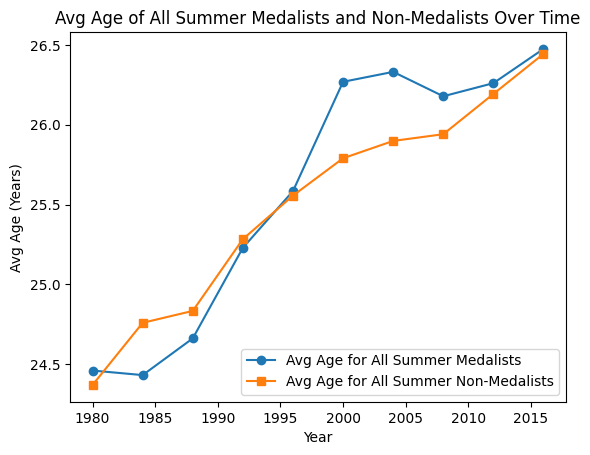

In [ ]:
as_yearly_avg_age_medalists = as_medalists.groupby('Year')[['Age']].mean().reset_index()
as_yearly_avg_age_non_medalists = as_non_medalists.groupby('Year')[['Age']].mean().reset_index()

plt.plot(as_yearly_avg_age_medalists['Year'], as_yearly_avg_age_medalists['Age'], label = 'Avg Age for All Summer Medalists', marker='o')
plt.plot(as_yearly_avg_age_non_medalists['Year'], as_yearly_avg_age_non_medalists['Age'], label = "Avg Age for All Summer Non-Medalists", marker = 's')

plt.title('Avg Age of All Summer Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Age (Years)')
plt.legend()
plt.show()

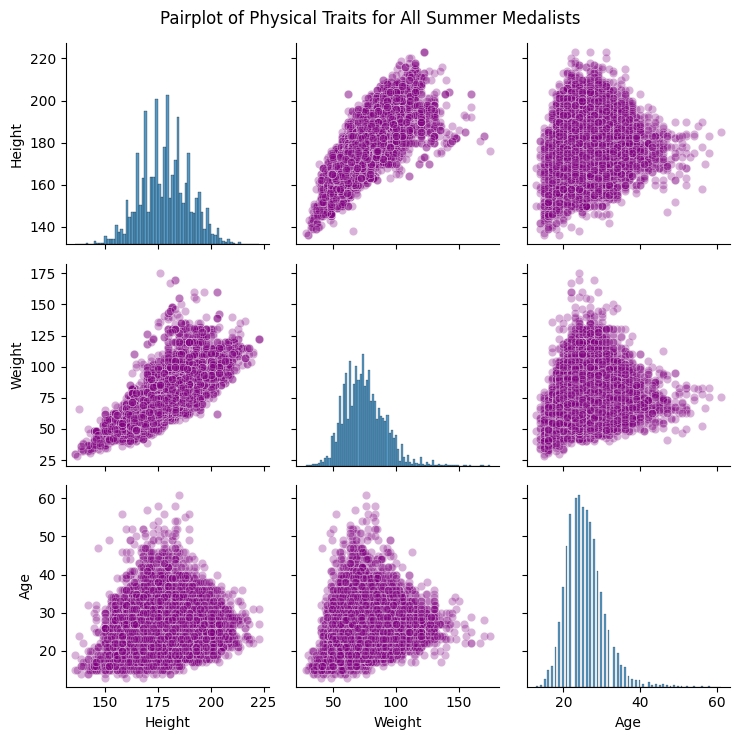

In [ ]:
sns.pairplot(as_medalists[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for All Summer Medalists")
plt.tight_layout()
plt.show()

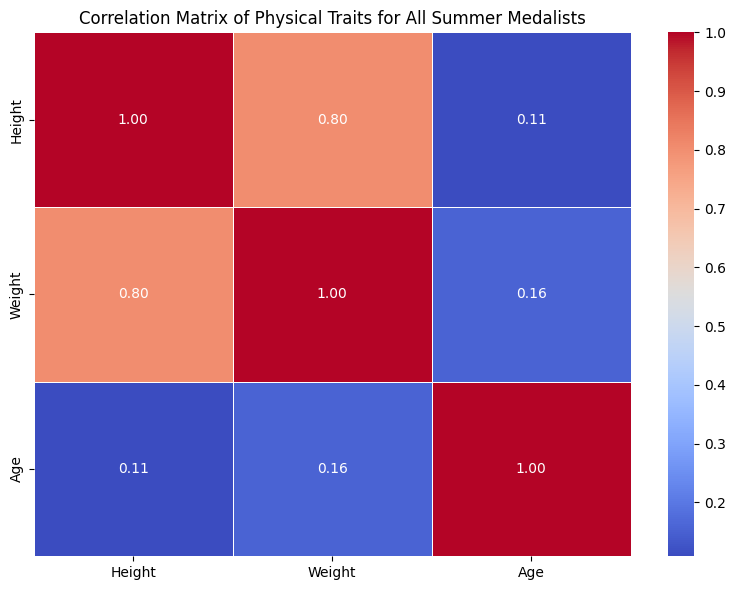

In [ ]:
# Select numeric columns for correlation
as_traits = as_medalists[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = as_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits for All Summer Medalists")
plt.tight_layout()
plt.show()

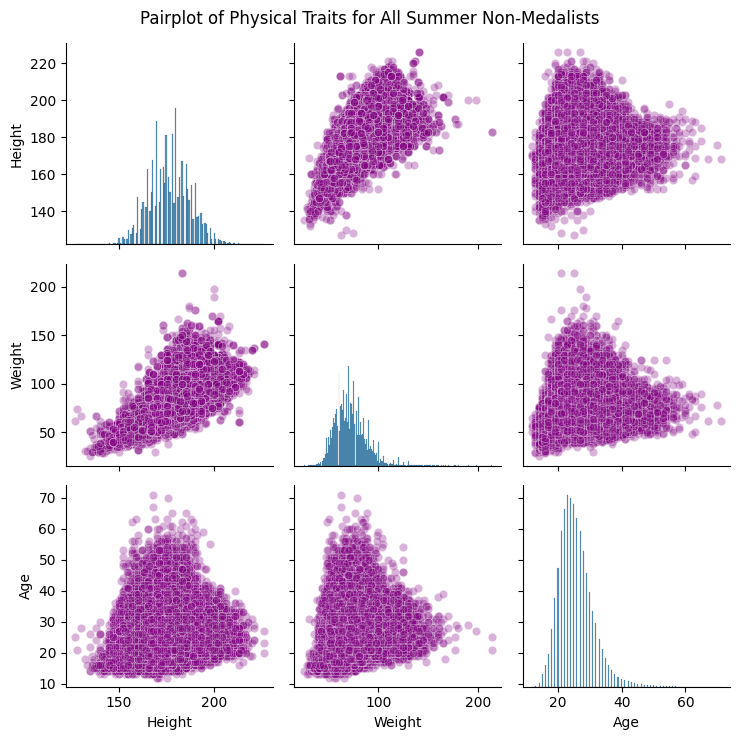

In [ ]:
sns.pairplot(as_non_medalists[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for All Summer Non-Medalists")
plt.tight_layout()
plt.show()

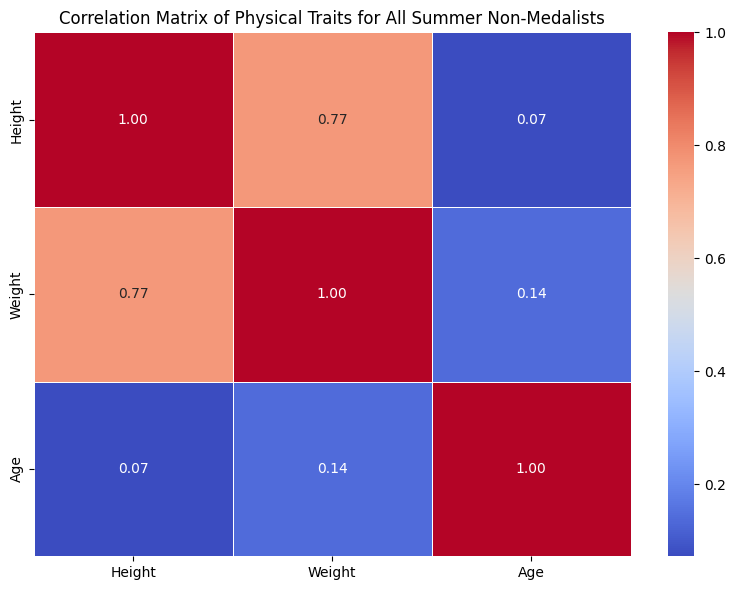

In [ ]:
# Select numeric columns for correlation
as_traits2 = as_non_medalists[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = as_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits for All Summer Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Prediction

In [11]:
as_features = all_summer_df[['Height', 'Weight', 'Age']]
as_label = all_summer_df['Medalist']

In [12]:
X_train_as, X_test_as, y_train_as, y_test_as = train_test_split(as_features, as_label, test_size= 0.2, random_state=42)

In [13]:
std_scaler = StandardScaler()
X_train_as_std = std_scaler.fit_transform(X_train_as)
X_test_as_std = std_scaler.transform(X_test_as)

In [14]:
norm_scaler = MinMaxScaler()
X_train_as_norm = norm_scaler.fit_transform(X_train_as)
X_test_as_norm = norm_scaler.transform(X_test_as)

### Unscaled Data Test

In [15]:
model_unscaled_as = KNeighborsClassifier(n_neighbors=5)
model_unscaled_as.fit(X_train_as, y_train_as)
pred_unscaled_as = model_unscaled_as.predict(X_test_as)
print(accuracy_score(y_test_as, pred_unscaled_as))

0.8002396905812497


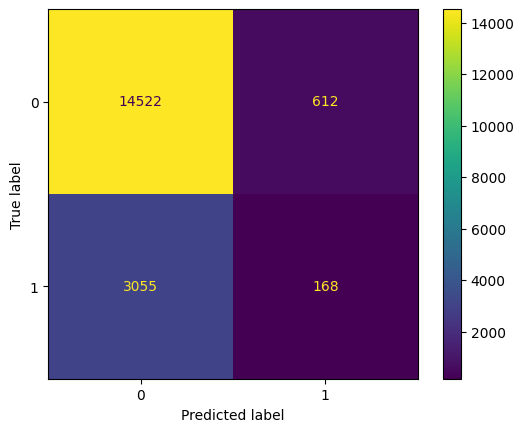

In [17]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_as,pred_unscaled_as, display_labels = model_unscaled_as.classes_)
plt.show()

/tmp/ipython-input-19-4083555347.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


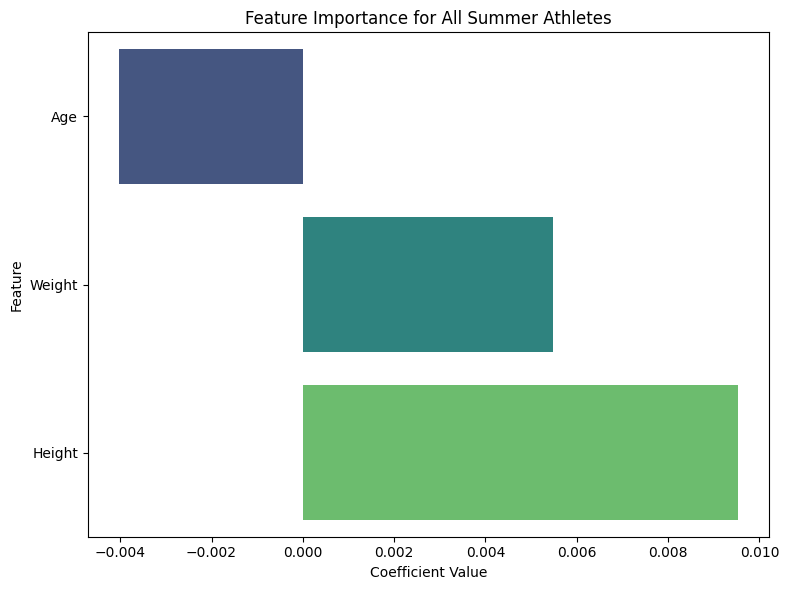

In [19]:
lr_model7 = LogisticRegression(max_iter=1000)
lr_model7.fit(X_train_as, y_train_as)

coeffs = lr_model7.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_as.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Summer Athletes")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Standardized Data Test

In [20]:
model_std_as = KNeighborsClassifier(n_neighbors=5)
model_std_as.fit(X_train_as_std, y_train_as)
pred_std_as = model_std_as.predict(X_test_as_std)
print(accuracy_score(y_test_as, pred_std_as))

0.8037260990357902


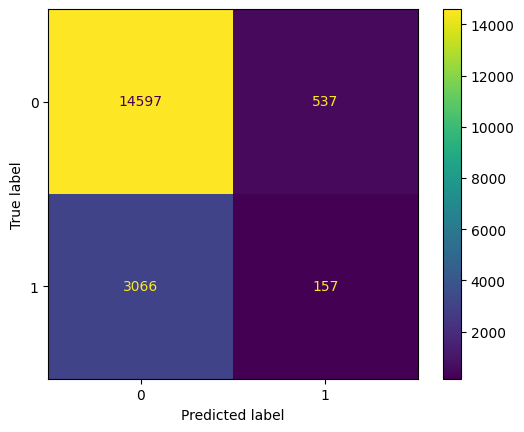

In [21]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_as, pred_std_as, display_labels = model_std_as.classes_)
plt.show()

/tmp/ipython-input-23-478887883.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


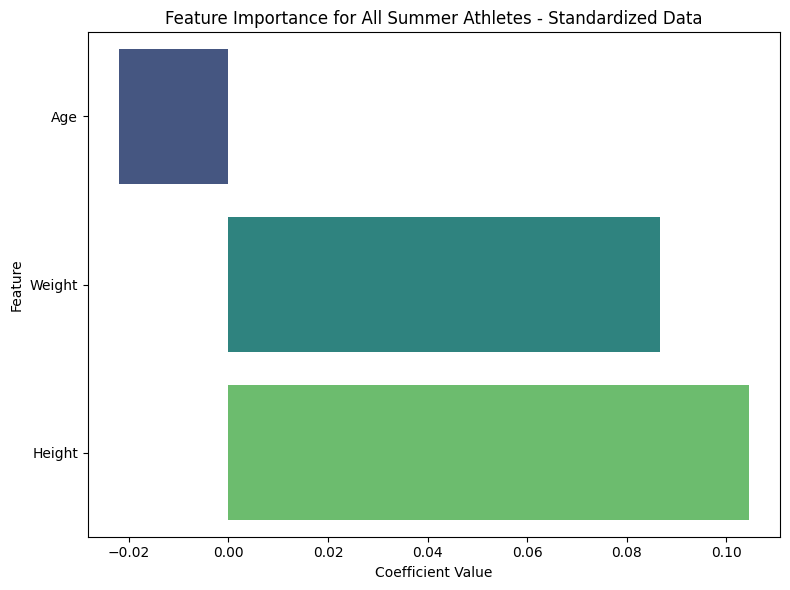

In [23]:
lr_model8 = LogisticRegression(max_iter=1000)
lr_model8.fit(X_train_as_std, y_train_as)

coeffs = lr_model8.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_as.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Summer Athletes - Standardized Data")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Normalized Data Test

In [24]:
model_norm_as = KNeighborsClassifier(n_neighbors=5)
model_norm_as.fit(X_train_as_norm, y_train_as)
pred_norm_as = model_norm_as.predict(X_test_as_norm)
print(accuracy_score(y_test_as, pred_norm_as))

0.8010568175627826


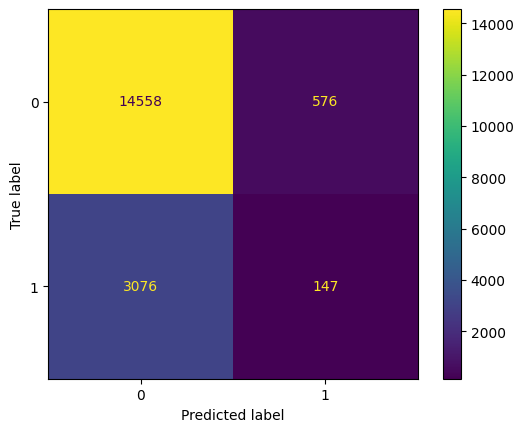

In [26]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_as, pred_norm_as, display_labels = model_norm_as.classes_)
plt.show()

/tmp/ipython-input-25-473740285.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


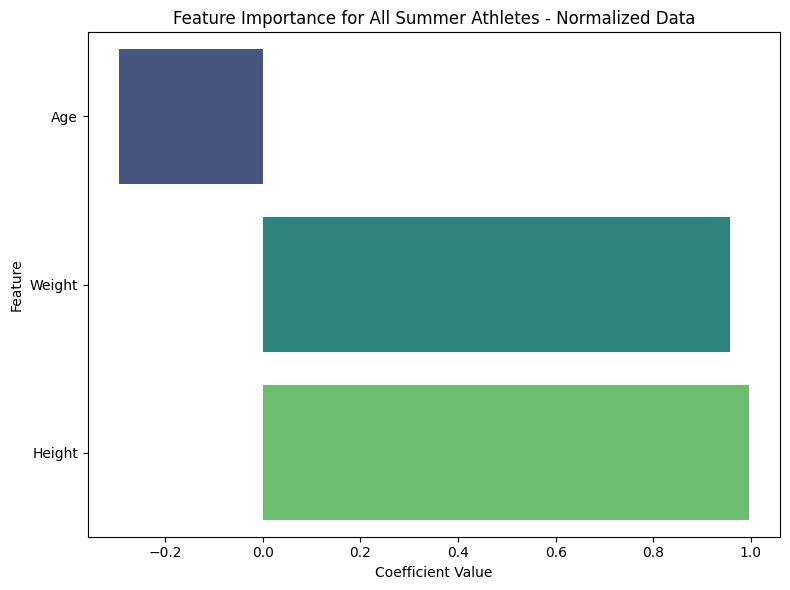

In [25]:
lr_model9 = LogisticRegression(max_iter=1000)
lr_model9.fit(X_train_as_norm, y_train_as)

coeffs = lr_model9.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_as.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title("Feature Importance for All Summer Athletes - Normalized Data")
plt.tight_layout()
plt.show()

### Analysis

# **Below: Visualization and Analysis of Recent Data For Males**

## **All Seasons**

In [27]:
male_df = all_df[all_df['Sex']== 'M']
male_df.reset_index(drop=True, inplace=True)
male_df.head()

ID Sex   Age  Height  Weight  Year                 Sport  Medalist  \
0   1   M  24.0   180.0    80.0  1992            Basketball         0   
1   2   M  23.0   170.0    60.0  2012                  Judo         0   
2   6   M  31.0   188.0    75.0  1992  Cross Country Skiing         0   
3   6   M  33.0   188.0    75.0  1994  Cross Country Skiing         0   
4   7   M  31.0   183.0    72.0  1992  Cross Country Skiing         0   

   Season Encoded  
0               1  
1               1  
2               0  
3               0  
4               0

### Visualizations

In [28]:
am_medalist = male_df[male_df['Medalist']==1]
am_non_medalist = male_df[male_df['Medalist']==0]

In [29]:
am_grouped_height = male_df.groupby('Medalist')[['Height']].describe()
am_grouped_height

Height                                                          
            count        mean        std    min    25%    50%    75%    max
Medalist                                                                   
0         59560.0  180.587592   9.315579  127.0  175.0  180.0  186.0  226.0
1         11593.0  182.718710  10.232139  142.0  176.0  183.0  190.0  223.0

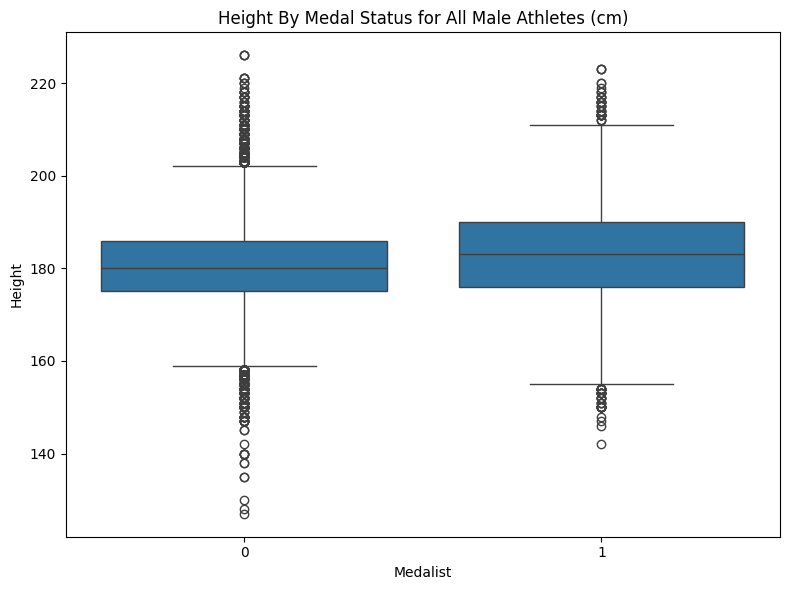

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Height', data=male_df)
plt.title("Height By Medal Status for All Male Athletes (cm)")
plt.tight_layout()
plt.show()

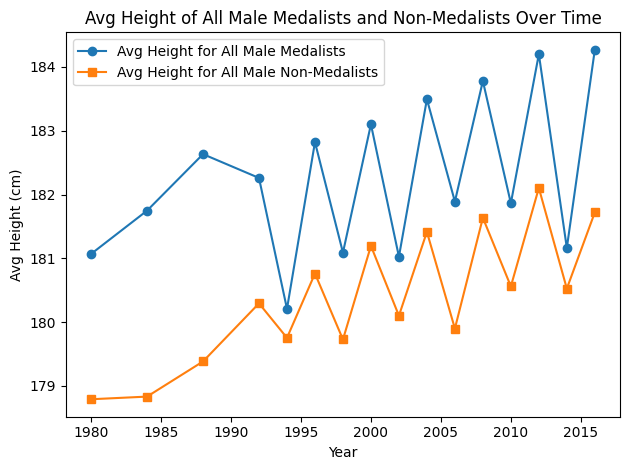

In [32]:
am_yearly_avg_height_medalist = am_medalist.groupby('Year')[['Height']].mean().reset_index()
am_yearly_avg_height_non_medalist = am_non_medalist.groupby('Year')[['Height']].mean().reset_index()

plt.plot(am_yearly_avg_height_medalist['Year'], am_yearly_avg_height_medalist['Height'], label = 'Avg Height for All Male Medalists', marker = 'o')
plt.plot(am_yearly_avg_height_non_medalist['Year'], am_yearly_avg_height_non_medalist['Height'], label = 'Avg Height for All Male Non-Medalists', marker = 's')

plt.title("Avg Height of All Male Medalists and Non-Medalists Over Time")
plt.xlabel('Year')
plt.ylabel('Avg Height (cm)')
plt.tight_layout()
plt.legend()
plt.show()

In [34]:
am_grouped_weight = male_df.groupby('Medalist')[['Weight']].describe()
am_grouped_weight

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         59560.0  77.915086  14.163029  37.0  69.0  76.0  85.0  214.0
1         11593.0  81.173855  14.518893  41.0  72.0  80.0  90.0  175.0

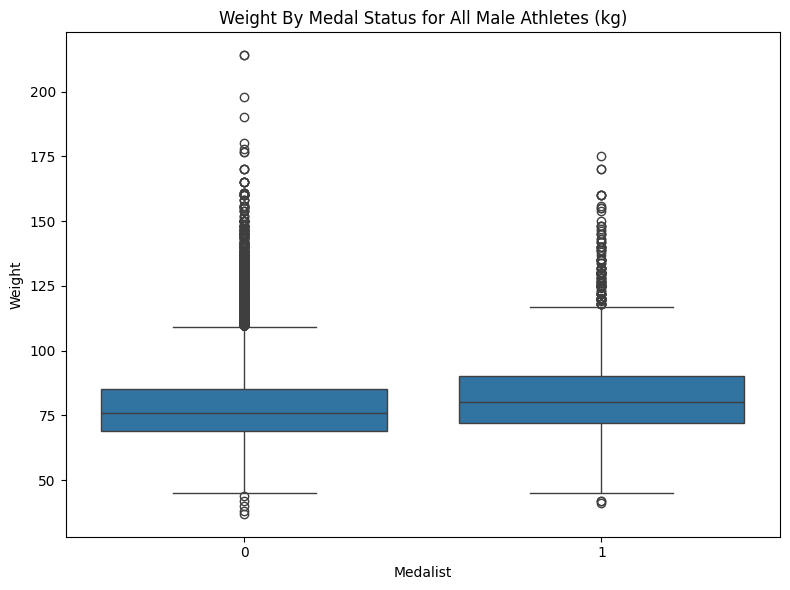

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Weight', data=male_df)
plt.title("Weight By Medal Status for All Male Athletes (kg)")
plt.tight_layout()
plt.show()

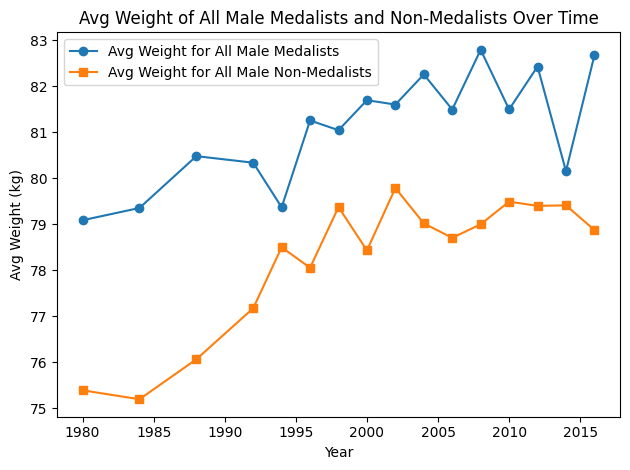

In [122]:
am_yearly_avg_weight_medalist = am_medalist.groupby('Year')[['Weight']].mean().reset_index()
am_yearly_avg_weight_non_medalist = am_non_medalist.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(am_yearly_avg_weight_medalist['Year'], am_yearly_avg_weight_medalist['Weight'], label = 'Avg Weight for All Male Medalists', marker = 'o')
plt.plot(am_yearly_avg_weight_non_medalist['Year'], am_yearly_avg_weight_non_medalist['Weight'], label = 'Avg Weight for All Male Non-Medalists', marker='s')

plt.title('Avg Weight of All Male Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Weight (kg)')
plt.tight_layout()
plt.legend()
plt.show()

In [37]:
am_grouped_age = male_df.groupby('Medalist')[['Age']].describe()
am_grouped_age

Age                                                   
            count       mean       std   min   25%   50%   75%   max
Medalist                                                            
0         59560.0  25.991807  5.262737  12.0  22.0  25.0  29.0  71.0
1         11593.0  26.177780  4.897435  14.0  23.0  26.0  29.0  61.0

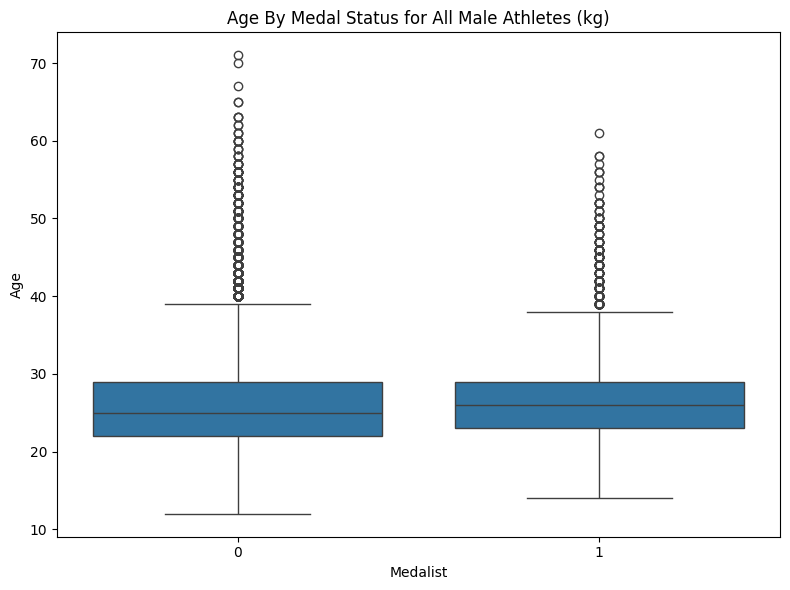

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Age', data = male_df)
plt.title('Age By Medal Status for All Male Athletes (kg)')
plt.tight_layout()
plt.show()

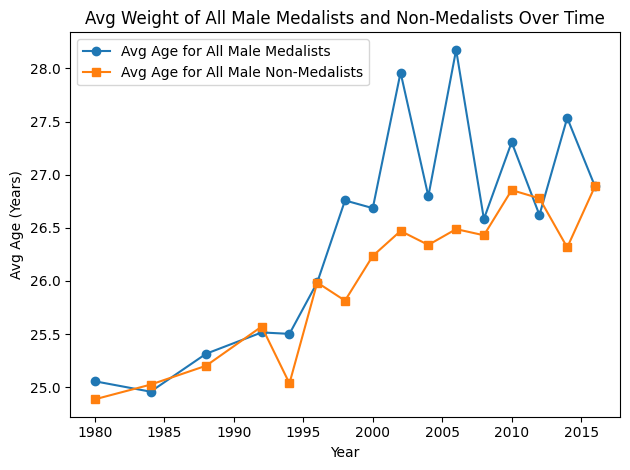

In [39]:
am_yearly_avg_age_medalist = am_medalist.groupby('Year')[['Age']].mean().reset_index()
am_yearly_avg_age_non_medalist = am_non_medalist.groupby('Year')[['Age']].mean().reset_index()

plt.plot(am_yearly_avg_age_medalist['Year'], am_yearly_avg_age_medalist['Age'], label = 'Avg Age for All Male Medalists', marker = 'o')
plt.plot(am_yearly_avg_age_non_medalist['Year'], am_yearly_avg_age_non_medalist['Age'], label = 'Avg Age for All Male Non-Medalists', marker= 's')

plt.title('Avg Weight of All Male Medalists and Non-Medalists Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Age (Years)')
plt.tight_layout()
plt.legend()
plt.show()

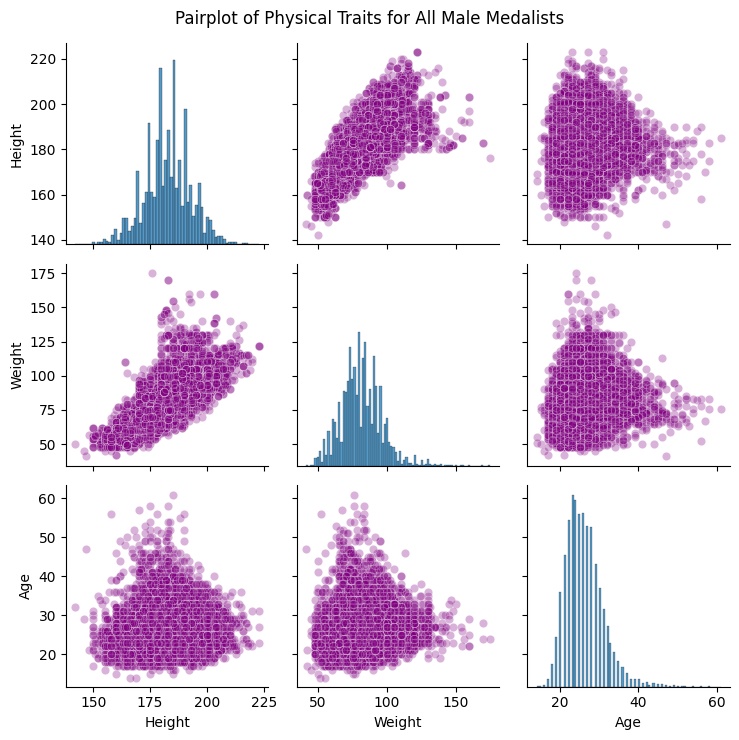

In [40]:
sns.pairplot(am_medalist[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for All Male Medalists")
plt.tight_layout()
plt.show()

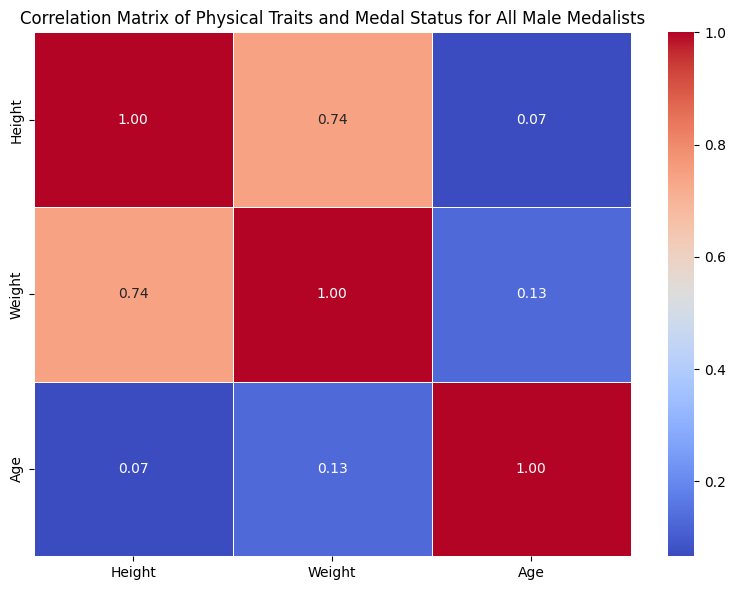

In [44]:
# Select numeric columns for correlation
am_traits = am_medalist[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = am_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits and Medal Status for All Male Medalists")
plt.tight_layout()
plt.show()

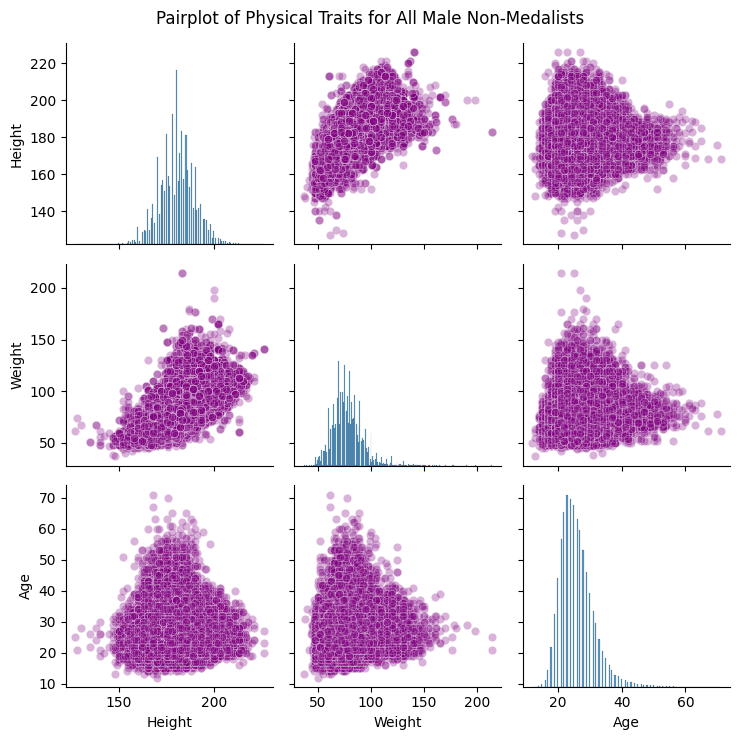

In [45]:
sns.pairplot(am_non_medalist[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Pairplot of Physical Traits for All Male Non-Medalists")
plt.tight_layout()
plt.show()

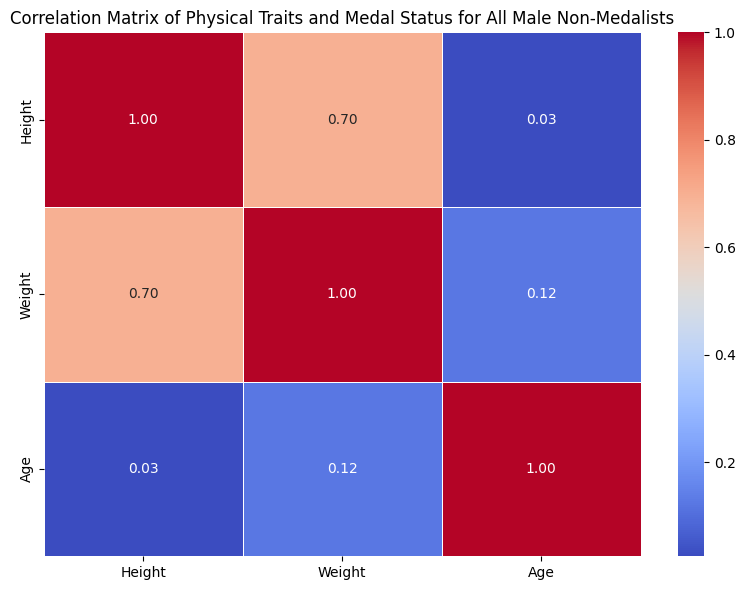

In [47]:
# Select numeric columns for correlation
am_traits2 = am_non_medalist[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = am_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Physical Traits and Medal Status for All Male Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Predictions

In [48]:
am_features = male_df[['Height', 'Weight', 'Age']]
am_label = male_df['Medalist']

In [49]:
X_train_am, X_test_am, y_train_am, y_test_am = train_test_split(am_features, am_label, test_size=0.2, random_state=42)

In [50]:
std_scaler = StandardScaler()
X_train_am_std = std_scaler.fit_transform(X_train_am)
X_test_am_std = std_scaler.transform(X_test_am)

In [51]:
norm_scaler = MinMaxScaler()
X_train_am_norm = norm_scaler.fit_transform(X_train_am)
X_test_am_norm = norm_scaler.transform(X_test_am)

### Unscaled Data Test

In [52]:
model_unscaled_am = KNeighborsClassifier(n_neighbors=5)
model_unscaled_am.fit(X_train_am, y_train_am)
pred_unscaled_am = model_unscaled_am.predict(X_test_am)
print(accuracy_score(y_test_am, pred_unscaled_am))

0.8159651465111376


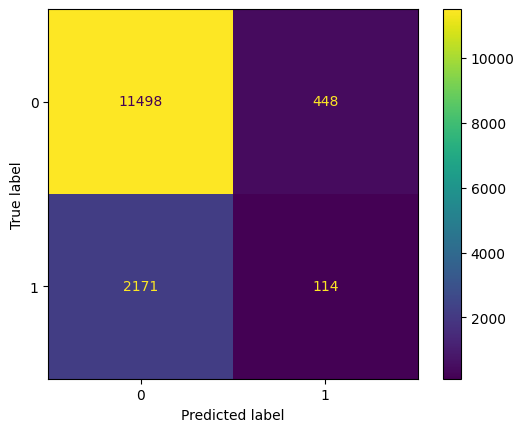

In [54]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_am, pred_unscaled_am, display_labels = model_unscaled_am.classes_)
plt.show()

/tmp/ipython-input-56-3241576221.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


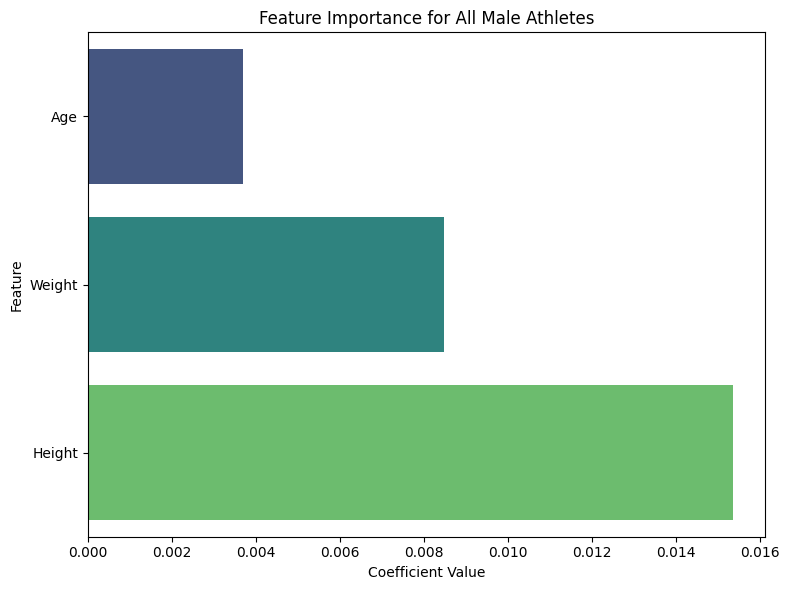

In [56]:
lr_am = LogisticRegression(max_iter=1000)
lr_am.fit(X_train_am, y_train_am)

coeffs = lr_am.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_am.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Male Athletes")
plt.xlabel("Coefficient Value")
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Standardized Data Test

In [126]:
model_std_am = KNeighborsClassifier(n_neighbors=5)
model_std_am.fit(X_train_am_std, y_train_am)
pred_std_am = model_std_am.predict(X_test_am_std)
print(accuracy_score(y_test_am, pred_std_am))

0.8175813365188672


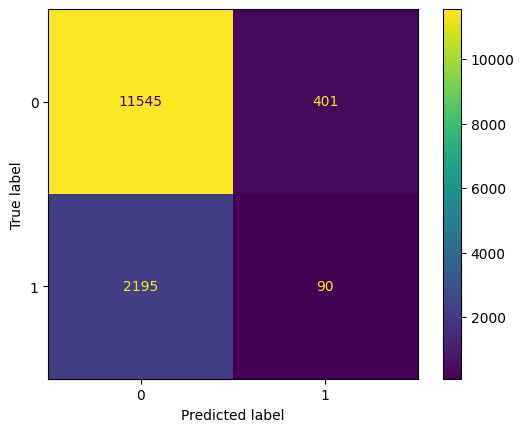

In [127]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_am, pred_std_am, display_labels = model_std_am.classes_)
plt.show()

/tmp/ipython-input-128-3017620052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


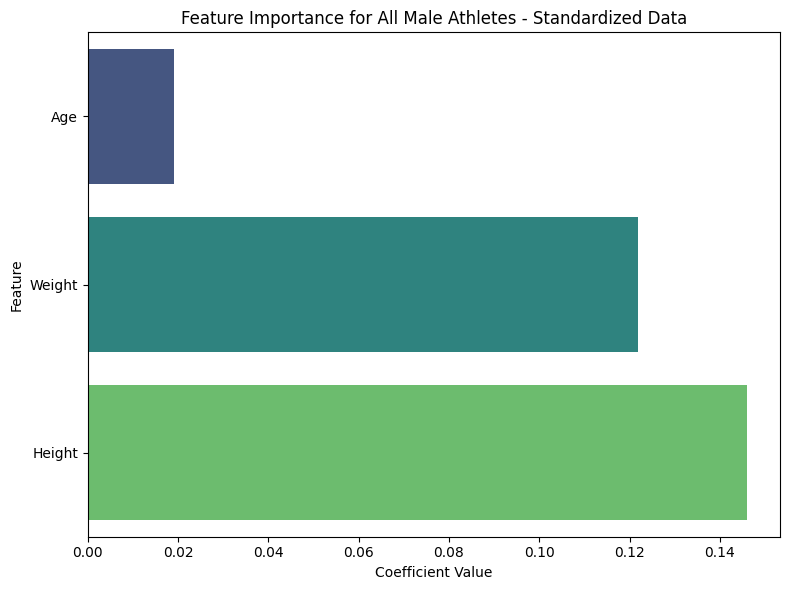

In [128]:
lr_am2 = LogisticRegression(max_iter=1000)
lr_am2.fit(X_train_am_std, y_train_am)

coeffs = lr_am2.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_am.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Male Athletes - Standardized Data")
plt.xlabel("Coefficient Value")
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Normalized Data Test

In [129]:
model_norm_am = KNeighborsClassifier(n_neighbors=5)
model_norm_am.fit(X_train_am_norm, y_train_am)
pred_norm_am = model_norm_am.predict(X_test_am_norm)
print(accuracy_score(y_test_am, pred_norm_am))

0.817229990865013


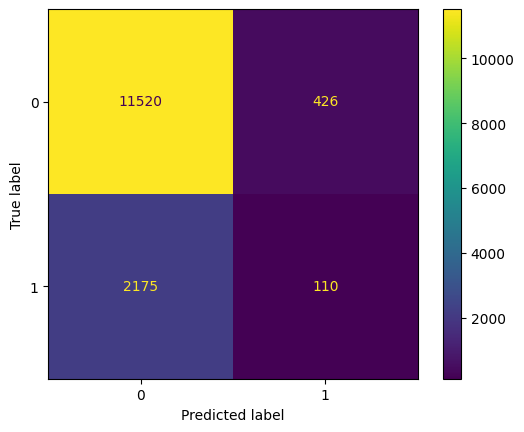

In [130]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_am, pred_norm_am, display_labels = model_norm_am.classes_)
plt.show()

/tmp/ipython-input-132-4218122135.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


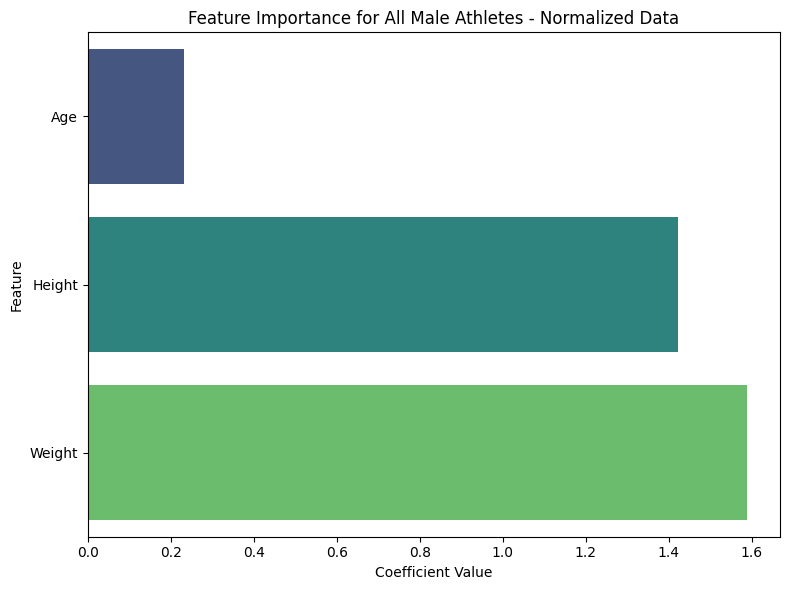

In [132]:
lr_am3 = LogisticRegression(max_iter=1000)
lr_am3.fit(X_train_am_norm, y_train_am)

coeffs = lr_am3.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_am.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Male Athletes - Normalized Data")
plt.xlabel("Coefficient Value")
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Analysis

## **Winter Season**

In [57]:
male_winter_df = all_df[all_df['Season Encoded'] == 0]
male_winter_df = male_winter_df[male_winter_df['Sex'] == 'M']
male_winter_df.reset_index(drop=True, inplace=True)
male_winter_df.head()

ID Sex   Age  Height  Weight  Year                 Sport  Medalist  \
0   6   M  31.0   188.0    75.0  1992  Cross Country Skiing         0   
1   6   M  33.0   188.0    75.0  1994  Cross Country Skiing         0   
2   7   M  31.0   183.0    72.0  1992  Cross Country Skiing         0   
3   7   M  33.0   183.0    72.0  1994  Cross Country Skiing         0   
4   9   M  26.0   186.0    96.0  2002            Ice Hockey         0   

   Season Encoded  
0               0  
1               0  
2               0  
3               0  
4               0

### Visualizations

In [58]:
mw_medalists_df = male_winter_df[male_winter_df['Medalist'] == 1]
mw_non_medalists_df = male_winter_df[male_winter_df['Medalist'] == 0]

In [59]:
mw_grouped_height = male_winter_df.groupby('Medalist')[['Height']].describe()
mw_grouped_height

Height                                                         
            count        mean       std    min    25%    50%    75%    max
Medalist                                                                  
0         10934.0  179.769160  6.368780  149.0  175.0  180.0  184.0  206.0
1          2013.0  180.897665  6.177981  160.0  177.0  181.0  185.0  200.0

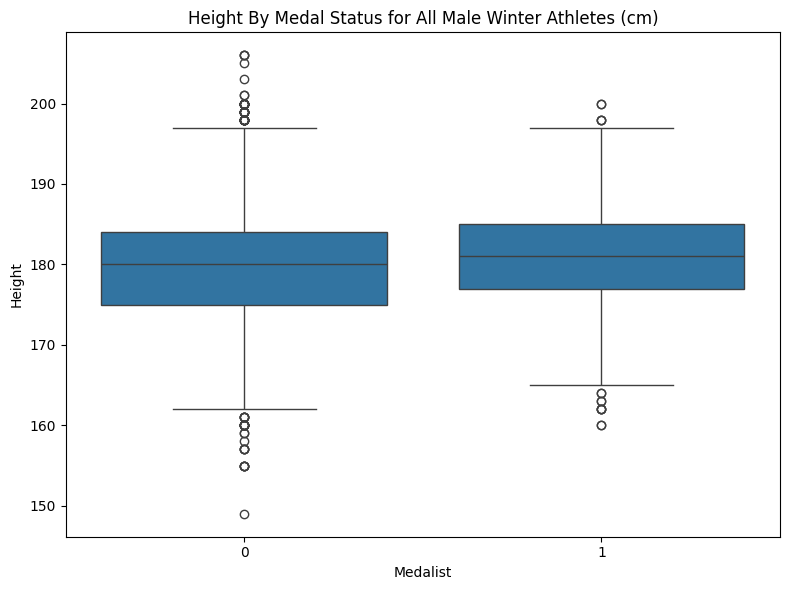

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Height', data = male_winter_df)
plt.title("Height By Medal Status for All Male Winter Athletes (cm)")
plt.tight_layout()
plt.show()

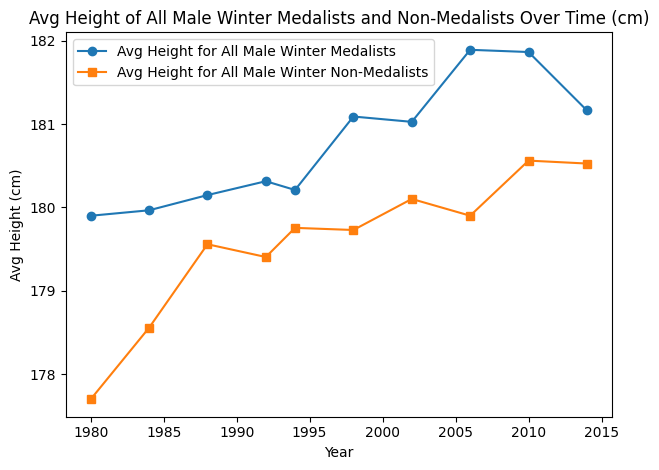

In [62]:
mw_yearly_avg_height_medalist = mw_medalists_df.groupby('Year')[['Height']].mean().reset_index()
mw_yearly_avg_height_non_medalist = mw_non_medalists_df.groupby('Year')[['Height']].mean().reset_index()

plt.plot(mw_yearly_avg_height_medalist['Year'], mw_yearly_avg_height_medalist['Height'], label = 'Avg Height for All Male Winter Medalists', marker = 'o')
plt.plot(mw_yearly_avg_height_non_medalist['Year'], mw_yearly_avg_height_non_medalist['Height'], label = 'Avg Height for All Male Winter Non-Medalists', marker = 's')

plt.title("Avg Height of All Male Winter Medalists and Non-Medalists Over Time (cm)")
plt.xlabel('Year')
plt.ylabel('Avg Height (cm)')
plt.tight_layout()
plt.legend()
plt.show()

In [63]:
mw_grouped_weight = male_winter_df.groupby('Medalist')[['Weight']].describe()
mw_grouped_weight

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         10934.0  78.530821  10.861082  47.0  70.0  78.0  86.0  127.0
1          2013.0  80.328117  11.280416  50.0  72.0  80.0  88.0  123.0

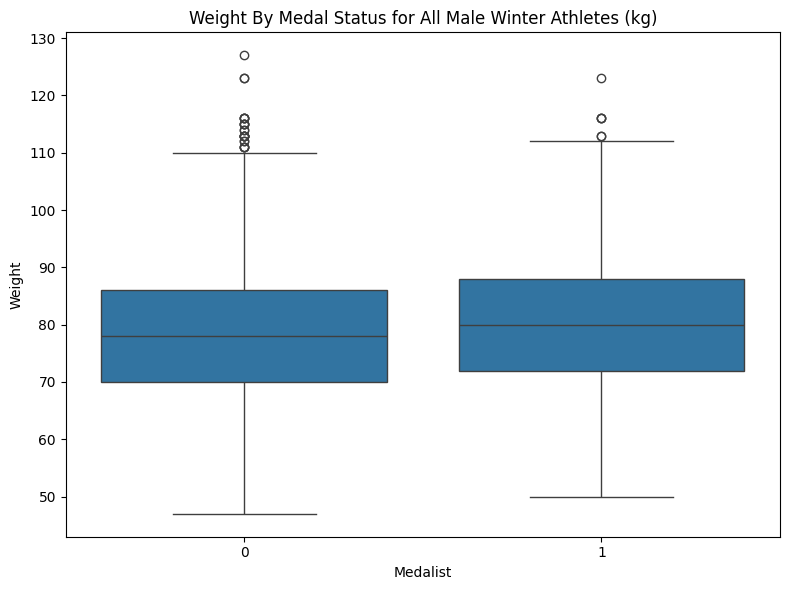

In [64]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Weight', data = male_winter_df)
plt.title("Weight By Medal Status for All Male Winter Athletes (kg)")
plt.tight_layout()
plt.show()

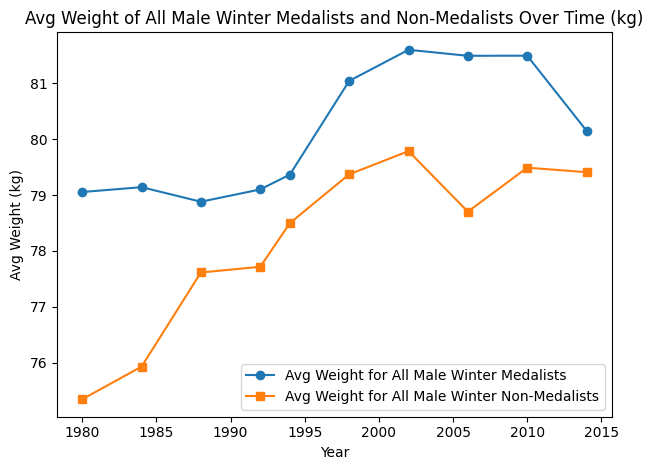

In [123]:
mw_yearly_avg_weight_medalist = mw_medalists_df.groupby('Year')[['Weight']].mean().reset_index()
mw_yearly_avg_weight_non_medalist = mw_non_medalists_df.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(mw_yearly_avg_weight_medalist['Year'], mw_yearly_avg_weight_medalist['Weight'], label = 'Avg Weight for All Male Winter Medalists', marker = 'o')
plt.plot(mw_yearly_avg_weight_non_medalist['Year'], mw_yearly_avg_weight_non_medalist['Weight'], label = 'Avg Weight for All Male Winter Non-Medalists', marker = 's')

plt.title("Avg Weight of All Male Winter Medalists and Non-Medalists Over Time (kg)")
plt.xlabel('Year')
plt.ylabel('Avg Weight (kg)')
plt.tight_layout()
plt.legend()
plt.show()

In [66]:
mw_grouped_age = male_winter_df.groupby('Medalist')[['Age']].describe()
mw_grouped_age

Age                                                   
            count       mean       std   min   25%   50%   75%   max
Medalist                                                            
0         10934.0  25.719682  4.714552  14.0  22.0  25.0  29.0  55.0
1          2013.0  26.563835  4.647251  15.0  23.0  26.0  29.0  50.0

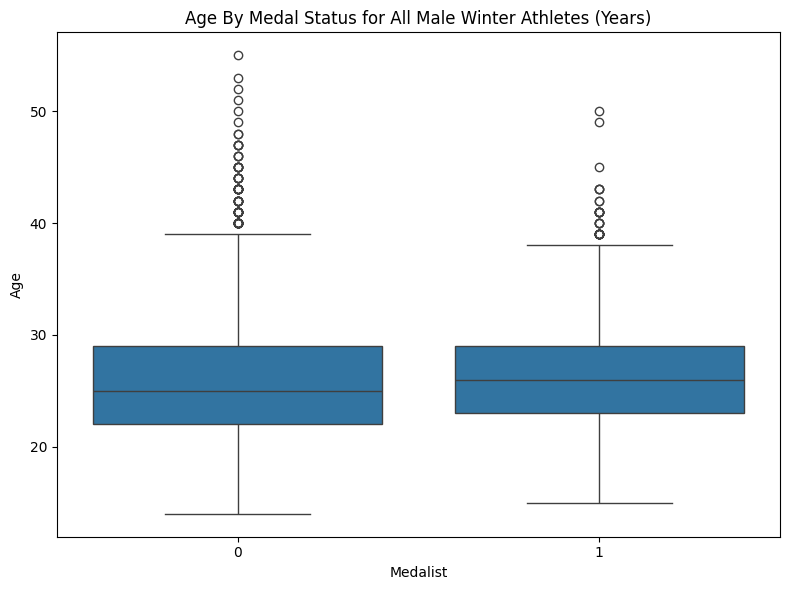

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Age', data = male_winter_df)
plt.title("Age By Medal Status for All Male Winter Athletes (Years)")
plt.tight_layout()
plt.show()

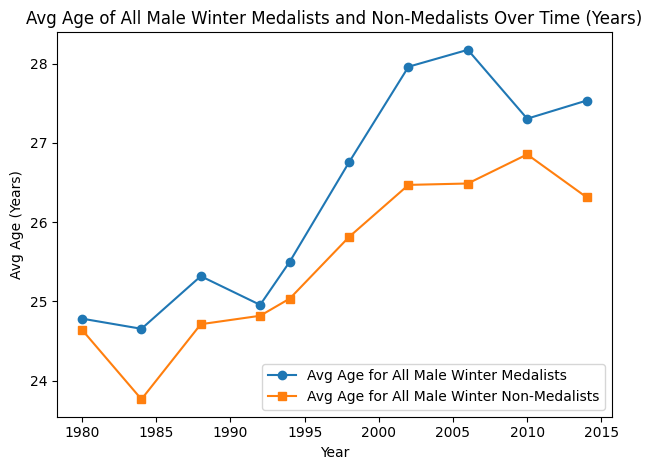

In [68]:
mw_yearly_avg_age_medalist = mw_medalists_df.groupby('Year')[['Age']].mean().reset_index()
mw_yearly_avg_age_non_medalist = mw_non_medalists_df.groupby('Year')[['Age']].mean().reset_index()

plt.plot(mw_yearly_avg_age_medalist['Year'], mw_yearly_avg_age_medalist['Age'], label = 'Avg Age for All Male Winter Medalists', marker = 'o')
plt.plot(mw_yearly_avg_age_non_medalist['Year'], mw_yearly_avg_age_non_medalist['Age'], label = 'Avg Age for All Male Winter Non-Medalists', marker = 's')

plt.title("Avg Age of All Male Winter Medalists and Non-Medalists Over Time (Years)")
plt.xlabel('Year')
plt.ylabel('Avg Age (Years)')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
sns.pairplot(mw_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Male Winter Season Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
mw_traits = mw_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = mw_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Male Physical Traits for Medalists")
plt.tight_layout()

In [ ]:
sns.pairplot(mw_non_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Male Winter Season Non-Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
mw_traits2 = mw_non_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = mw_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Male Physical Traits for Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Predictions

In [69]:
mw_features = male_winter_df[['Height', 'Age', 'Weight']]
mw_label = male_winter_df['Medalist']

In [70]:
X_train_mw, X_test_mw, y_train_mw, y_test_mw = train_test_split(mw_features, mw_label, test_size=0.2, random_state=42)

In [71]:
#create a standardized version of the training and testing data
std_scaler = StandardScaler()
X_train_mw_std = std_scaler.fit_transform(X_train_mw)
X_test__mw_std = std_scaler.transform(X_test_mw)

In [72]:
#create a normalized version of the training and testing data
norm_scaler = MinMaxScaler()
X_train_mw_norm = norm_scaler.fit_transform(X_train_mw)
X_test_mw_norm = norm_scaler.transform(X_test_mw)

### Unscaled Training Data Test

In [73]:
#test on unscaled training data
model_unscaled_mw = KNeighborsClassifier(n_neighbors=5)
model_unscaled_mw.fit(X_train_mw, y_train_mw)
pred_unscaled_mw = model_unscaled_mw.predict(X_test_mw)
print(accuracy_score(y_test_mw, pred_unscaled_mw))

0.816988416988417


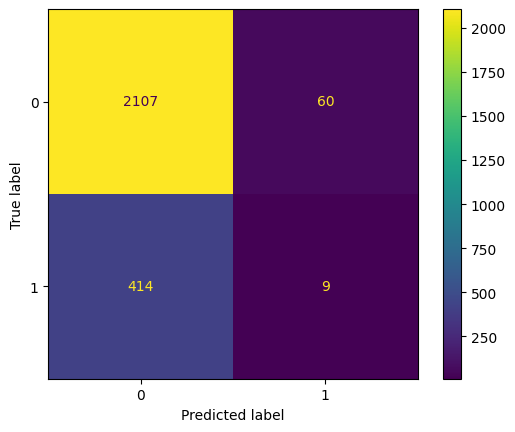

In [74]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_unscaled_mw, display_labels = model_unscaled_mw.classes_)
plt.show()

/tmp/ipython-input-75-842696251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y= feature_importance.index, palette='viridis')


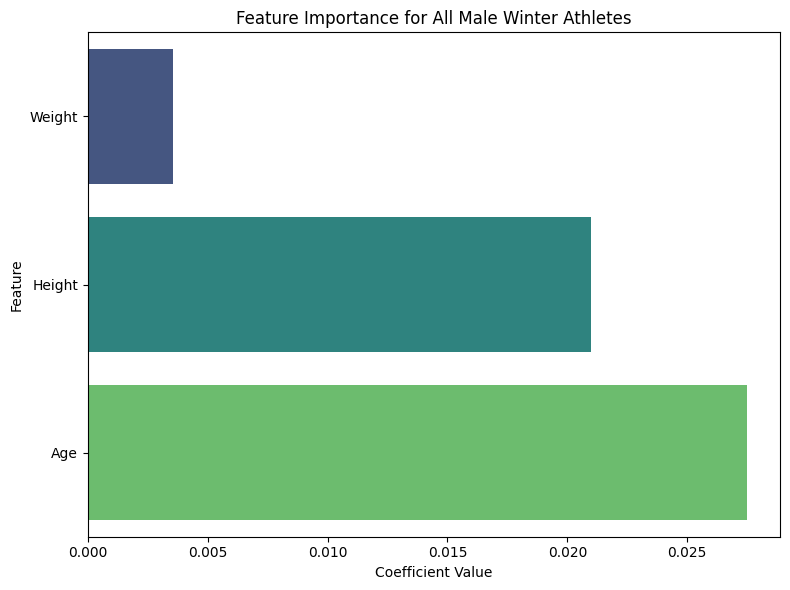

In [75]:
mw_model = LogisticRegression(max_iter=1000)
mw_model.fit(X_train_mw, y_train_mw)

coeffs = mw_model.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_mw.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y= feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Male Winter Athletes")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Standardized Data Training Test

In [76]:
model_std_mw = KNeighborsClassifier(n_neighbors=5)
model_std_mw.fit(X_train_mw_std, y_train_mw)
pred_std_mw = model_std_mw.predict(X_test__mw_std)
print(accuracy_score(y_test_mw, pred_std_mw))

0.8216216216216217


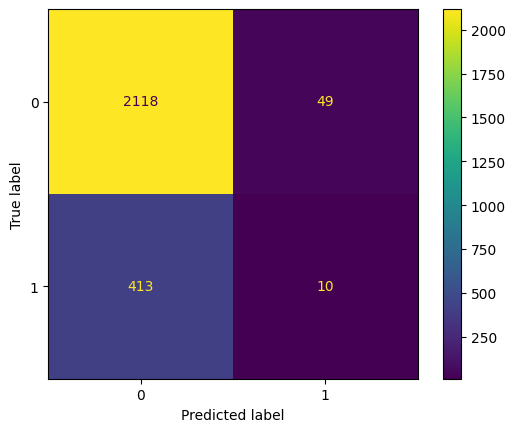

In [77]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_std_mw, display_labels=model_std_mw.classes_)
plt.show()

/tmp/ipython-input-78-2351492633.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


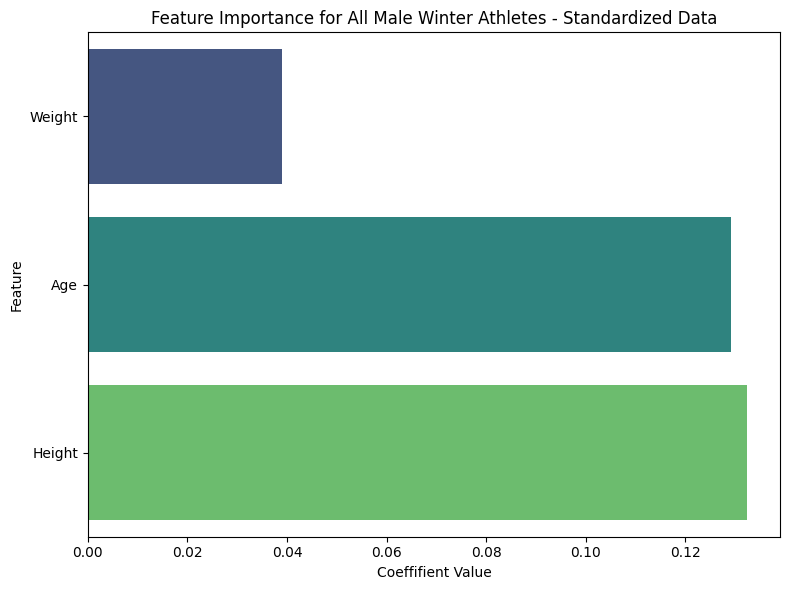

In [78]:
mw_model2 = LogisticRegression(max_iter=1000)
mw_model2.fit(X_train_mw_std, y_train_mw)

coeffs = mw_model2.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_mw.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Male Winter Athletes - Standardized Data")
plt.xlabel('Coeffifient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Normalized Data Training Test

In [79]:
model_norm_mw = KNeighborsClassifier(n_neighbors = 5)
model_norm_mw.fit(X_train_mw_norm, y_train_mw)
pred_norm_mw = model_norm_mw.predict(X_test_mw_norm)
print(accuracy_score(y_test_mw, pred_norm_mw))

0.815057915057915


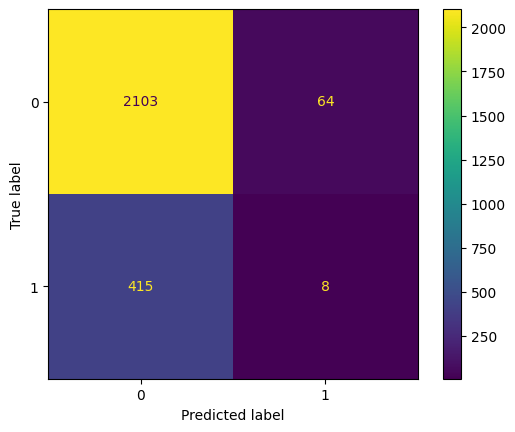

In [80]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_norm_mw, display_labels=model_norm_mw.classes_)
plt.show()

/tmp/ipython-input-81-3554305923.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y = feature_importance.index, palette = 'viridis')


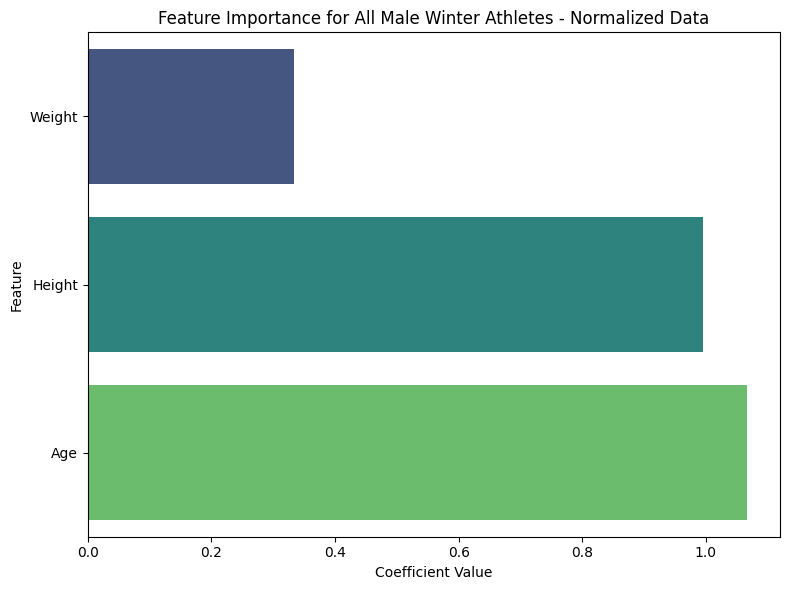

In [81]:
mw_model3 = LogisticRegression(max_iter=1000)
mw_model3.fit(X_train_mw_norm, y_train_mw)

coeffs = mw_model3.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_mw.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y = feature_importance.index, palette = 'viridis')
plt.title("Feature Importance for All Male Winter Athletes - Normalized Data")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Analysis

shjgfkjagdkjgbaerkjjlearbjerg

## **Summer Season**

In [83]:
male_summer_df = all_df[all_df['Season Encoded'] == 1]
male_summer_df = male_summer_df[male_summer_df['Sex'] == 'M']
male_summer_df.reset_index(drop=True, inplace=True)
male_summer_df.head()

ID Sex   Age  Height  Weight  Year       Sport  Medalist  Season Encoded
0   1   M  24.0   180.0    80.0  1992  Basketball         0               1
1   2   M  23.0   170.0    60.0  2012        Judo         0               1
2  12   M  31.0   172.0    70.0  2000   Badminton         0               1
3  18   M  31.0   189.0   130.0  2000   Athletics         0               1
4  23   M  22.0   187.0    89.0  2000   Wrestling         0               1

### Visualizations

In [84]:
ms_medalists_df = male_summer_df[male_summer_df['Medalist'] == 1]
ms_non_medalists_df = male_summer_df[male_summer_df['Medalist'] == 0]

In [85]:
ms_grouped_height = male_summer_df.groupby('Medalist')[['Height']].describe()
ms_grouped_height

Height                                                          
            count        mean        std    min    25%    50%    75%    max
Medalist                                                                   
0         48626.0  180.771624   9.848313  127.0  175.0  180.0  187.0  226.0
1          9580.0  183.101357  10.855333  142.0  176.0  183.0  190.0  223.0

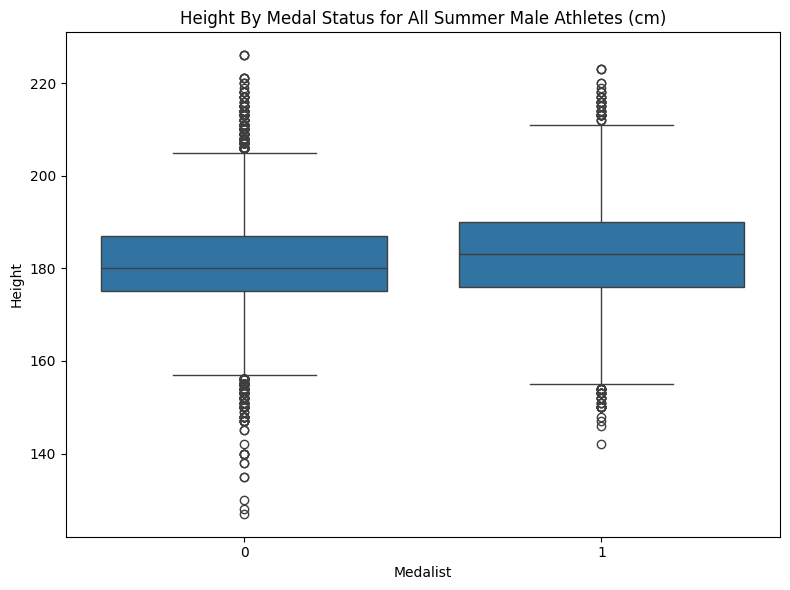

In [86]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Height', data = male_summer_df)
plt.title("Height By Medal Status for All Summer Male Athletes (cm)")
plt.tight_layout()
plt.show()

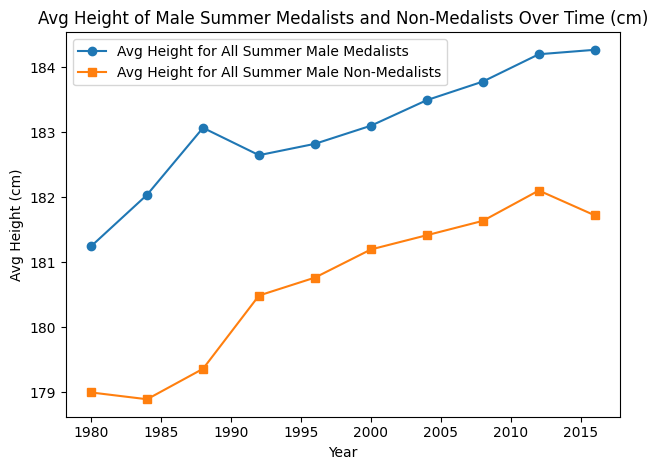

In [90]:
ms_yearly_avg_height_medalist = ms_medalists_df.groupby('Year')[['Height']].mean().reset_index()
ms_yearly_avg_height_non_medalist = ms_non_medalists_df.groupby('Year')[['Height']].mean().reset_index()

plt.plot(ms_yearly_avg_height_medalist['Year'], ms_yearly_avg_height_medalist['Height'], label = 'Avg Height for All Summer Male Medalists', marker = 'o')
plt.plot(ms_yearly_avg_height_non_medalist['Year'], ms_yearly_avg_height_non_medalist['Height'], label = 'Avg Height for All Summer Male Non-Medalists', marker ='s')

plt.title("Avg Height of Male Summer Medalists and Non-Medalists Over Time (cm)")
plt.xlabel('Year')
plt.ylabel('Avg Height (cm)')
plt.tight_layout()
plt.legend()
plt.show()

In [92]:
ms_grouped_weight = male_summer_df.groupby('Medalist')[['Weight']].describe()
ms_grouped_weight

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         48626.0  77.776632  14.800997  37.0  68.0  76.0  85.0  214.0
1          9580.0  81.351566  15.105878  41.0  72.0  80.0  90.0  175.0

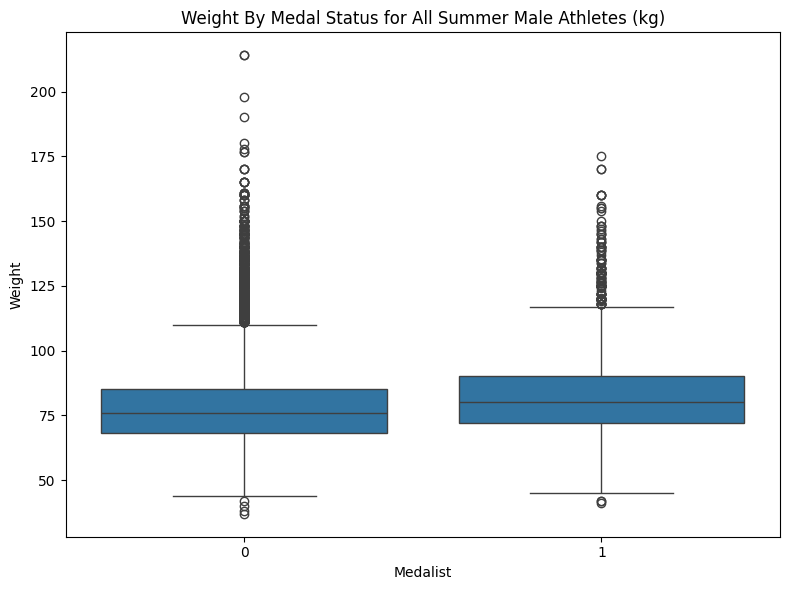

In [93]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Weight', data= male_summer_df)
plt.title("Weight By Medal Status for All Summer Male Athletes (kg)")
plt.tight_layout()
plt.show()

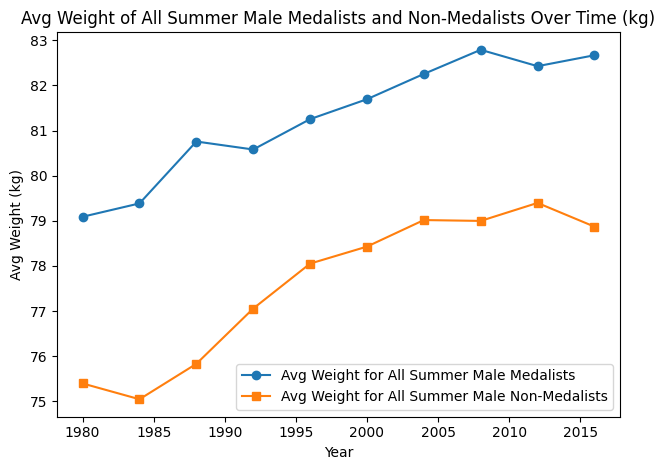

In [124]:
ms_yearly_avg_weight_medalist = ms_medalists_df.groupby('Year')[['Weight']].mean().reset_index()
ms_yearly_avg_weight_non_medalist = ms_non_medalists_df.groupby('Year')[['Weight']].mean().reset_index()

plt.plot(ms_yearly_avg_weight_medalist['Year'], ms_yearly_avg_weight_medalist['Weight'], label = 'Avg Weight for All Summer Male Medalists', marker = 'o')
plt.plot(ms_yearly_avg_weight_non_medalist['Year'], ms_yearly_avg_weight_non_medalist['Weight'], label = 'Avg Weight for All Summer Male Non-Medalists', marker = 's')

plt.title("Avg Weight of All Summer Male Medalists and Non-Medalists Over Time (kg)")
plt.xlabel('Year')
plt.ylabel('Avg Weight (kg)')
plt.tight_layout()
plt.legend()
plt.show()

In [95]:
ms_grouped_age = male_summer_df.groupby('Medalist')[['Weight']].describe()
ms_grouped_age

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         48626.0  77.776632  14.800997  37.0  68.0  76.0  85.0  214.0
1          9580.0  81.351566  15.105878  41.0  72.0  80.0  90.0  175.0

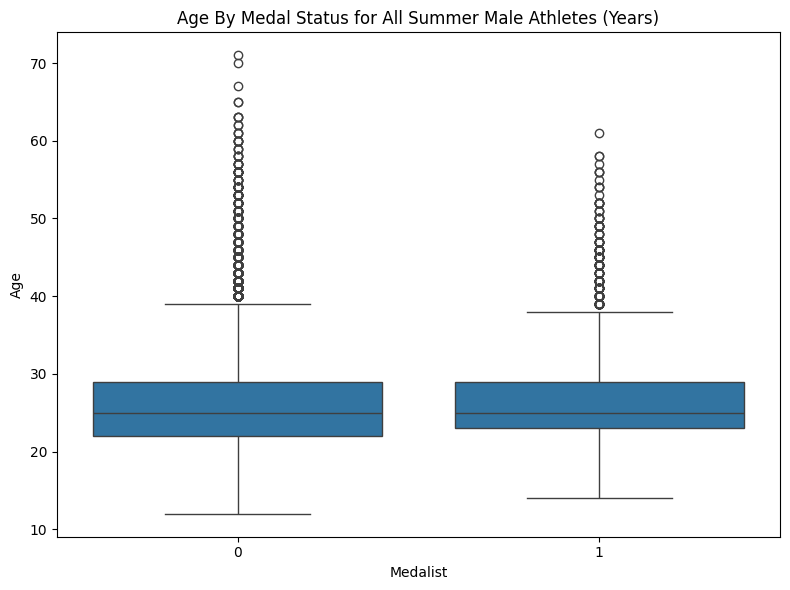

In [96]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Age', data= male_summer_df)
plt.title("Age By Medal Status for All Summer Male Athletes (Years)")
plt.tight_layout()
plt.show()

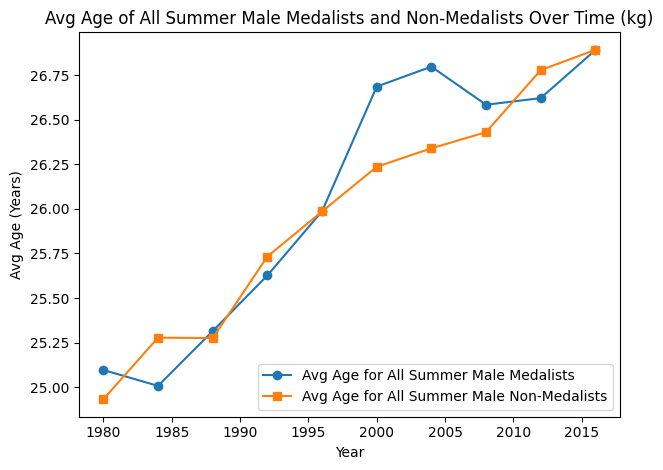

In [98]:
ms_yearly_avg_age_medalist = ms_medalists_df.groupby('Year')[['Age']].mean().reset_index()
ms_yearly_avg_age_non_medalist = ms_non_medalists_df.groupby('Year')[['Age']].mean().reset_index()

plt.plot(ms_yearly_avg_age_medalist['Year'], ms_yearly_avg_age_medalist['Age'], label = "Avg Age for All Summer Male Medalists", marker = 'o')
plt.plot(ms_yearly_avg_age_non_medalist['Year'], ms_yearly_avg_age_non_medalist['Age'], label = "Avg Age for All Summer Male Non-Medalists", marker = 's')

plt.title("Avg Age of All Summer Male Medalists and Non-Medalists Over Time (kg)")
plt.xlabel('Year')
plt.ylabel('Avg Age (Years)')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
sns.pairplot(ms_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Male Summer Season Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
ms_traits = ms_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = ms_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Male Phyisical Traits for Summer Medalists")
plt.tight_layout()

In [ ]:
sns.pairplot(ms_non_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Male Summer Season Non-Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
ms_traits2 = ms_non_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = ms_traits2.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Male Physical Traits for Summer Non-Medalists")
plt.tight_layout()

### Feature Prep + Predictions

In [99]:
ms_features = male_summer_df[['Height', 'Age', 'Weight']]
ms_label = male_summer_df['Medalist']

In [100]:
X_test_ms, X_train_ms, y_test_ms, y_train_ms = train_test_split(ms_features, ms_label, test_size=0.2, random_state=42)

In [101]:
#Create standardized version of training and testing data
std_scaler = StandardScaler()
X_train_ms_std = std_scaler.fit_transform(X_train_ms)
X_test_ms_std = std_scaler.transform(X_test_ms)

In [102]:
# Create a normalized version of training and testing data
norm_scaler = MinMaxScaler()
X_train_ms_norm = norm_scaler.fit_transform(X_train_ms)
X_test_ms_norm = norm_scaler.transform(X_test_ms)

### Unscaled Data Training Test

In [103]:
model_unscaled_ms = KNeighborsClassifier(n_neighbors=5)
model_unscaled_ms.fit(X_train_ms, y_train_ms)
pred_unscaled_ms = model_unscaled_ms.predict(X_test_ms)
print(accuracy_score(y_test_ms, pred_unscaled_ms))

0.8078558543080492


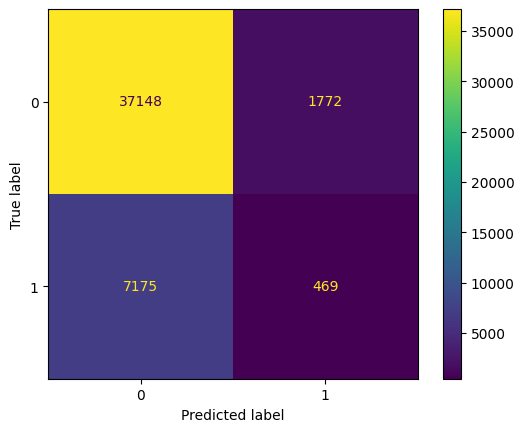

In [104]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_unscaled_ms, display_labels = model_unscaled_ms.classes_)
plt.show()

/tmp/ipython-input-105-2208982896.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y= feature_importance.index, palette='viridis')


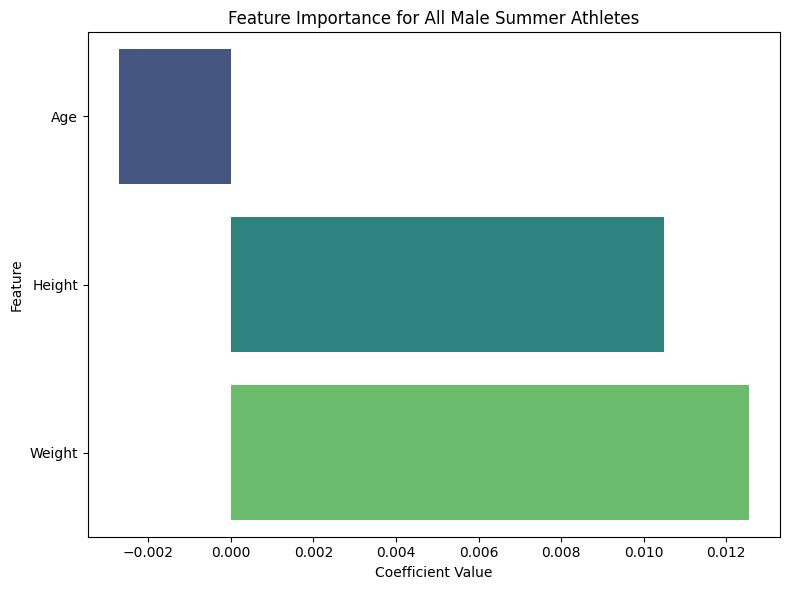

In [105]:
ms_model = LogisticRegression(max_iter=1000)
ms_model.fit(X_train_ms, y_train_ms)

coeffs = ms_model.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_ms.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y= feature_importance.index, palette='viridis')
plt.title('Feature Importance for All Male Summer Athletes')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Standardized Data Training Test

In [106]:
model_std_ms = KNeighborsClassifier(n_neighbors=5)
model_std_ms.fit(X_train_ms_std, y_train_ms)
pred_std_ms = model_std_ms.predict(X_test_ms_std)
print(accuracy_score(y_test_ms, pred_std_ms))

0.8122798728631561


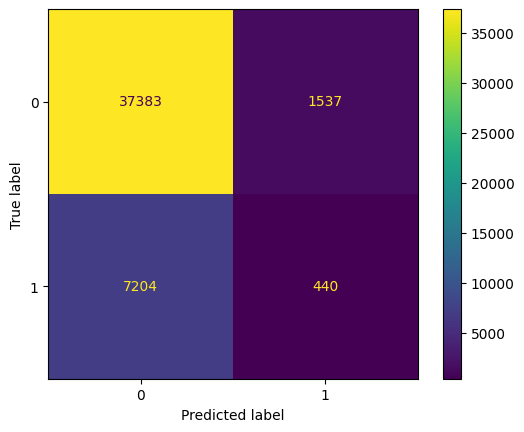

In [107]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_std_ms, display_labels=model_std_ms.classes_)
plt.show()

/tmp/ipython-input-109-628281015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


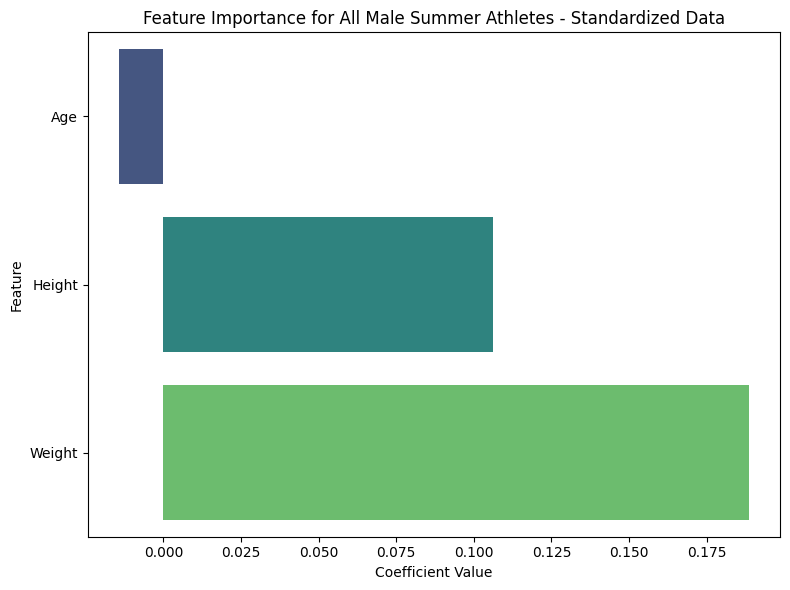

In [109]:
ms_model2 = LogisticRegression(max_iter=1000)
ms_model2.fit(X_train_ms_std, y_train_ms)

coeffs = ms_model2.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_ms.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Male Summer Athletes - Standardized Data")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Normalized Data Training Test

In [110]:
model_norm_ms = KNeighborsClassifier(n_neighbors=5)
model_norm_ms.fit(X_train_ms_norm, y_train_ms)
pred_norm_ms = model_norm_ms.predict(X_test_ms_norm)
print(accuracy_score(y_test_ms, pred_norm_ms))

0.8118503564985826


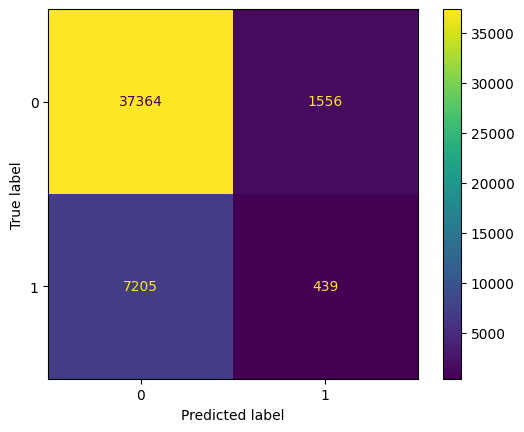

In [111]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_norm_ms, display_labels=model_norm_ms.classes_)
plt.show()

/tmp/ipython-input-113-1814735090.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


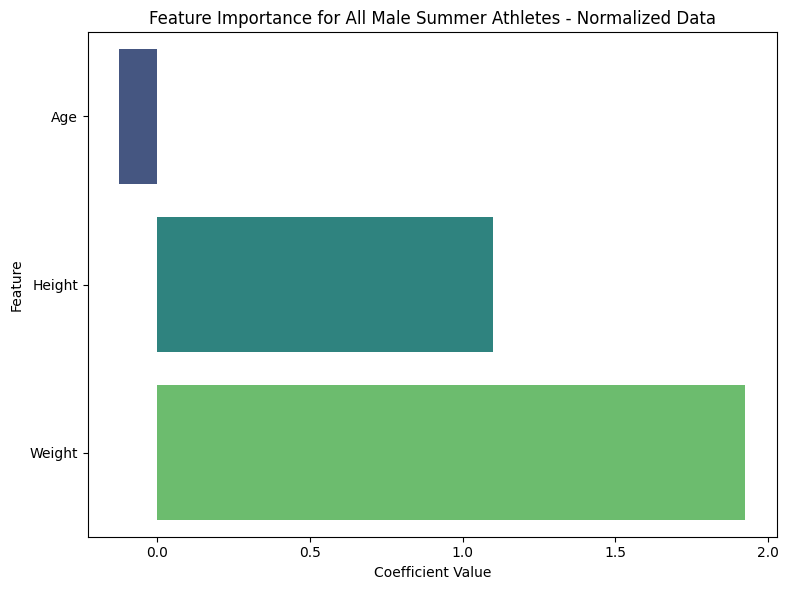

In [113]:
ms_model3 = LogisticRegression(max_iter=1000)
ms_model3.fit(X_train_ms_norm, y_train_ms)

coeffs = ms_model3.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_ms.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Male Summer Athletes - Normalized Data")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Analysis

# **Below: Visualization and Analysis of Recent Data for Females**

## All Seasons

In [114]:
female_df = all_df[all_df['Sex'] == 'F']
female_df.reset_index(drop=True, inplace=True)
female_df.head()

ID Sex   Age  Height  Weight  Year          Sport  Medalist  Season Encoded
0   5   F  21.0   185.0    82.0  1988  Speed Skating         0               0
1   5   F  25.0   185.0    82.0  1992  Speed Skating         0               0
2   5   F  27.0   185.0    82.0  1994  Speed Skating         0               0
3  13   F  30.0   159.0    55.5  1996        Sailing         0               1
4  13   F  34.0   159.0    55.5  2000        Sailing         0               1

### Visualizations

In [115]:
af_medalists = female_df[female_df['Medalist']== 1]
af_non_medalists = female_df[female_df['Medalist']== 0]

In [116]:
af_grouped_height = female_df.groupby('Medalist')[['Height']].describe()
af_grouped_height

Height                                                         
            count        mean       std    min    25%    50%    75%    max
Medalist                                                                  
0         32688.0  169.072228  8.380528  132.0  164.0  169.0  174.0  213.0
1          7620.0  171.245669  9.105931  136.0  165.0  171.0  177.0  210.0

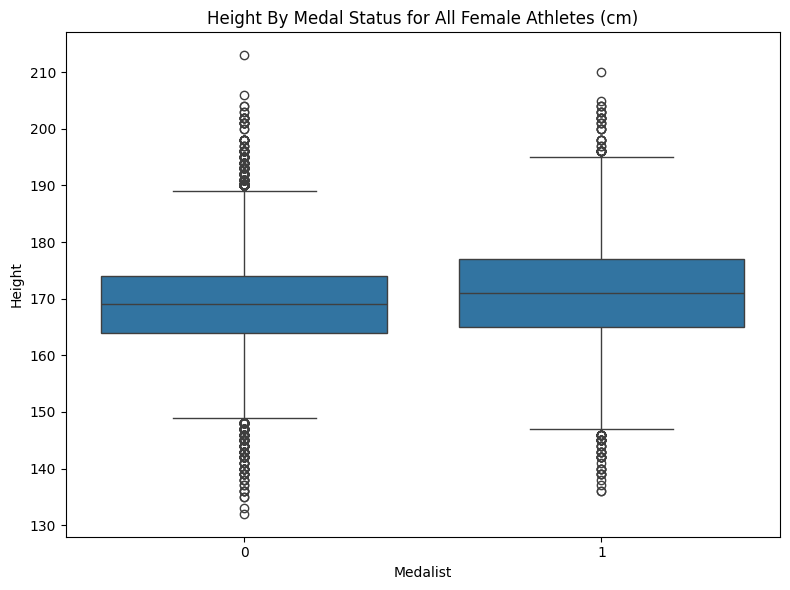

In [117]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Height', data=female_df)
plt.title("Height By Medal Status for All Female Athletes (cm)")
plt.tight_layout()
plt.show()

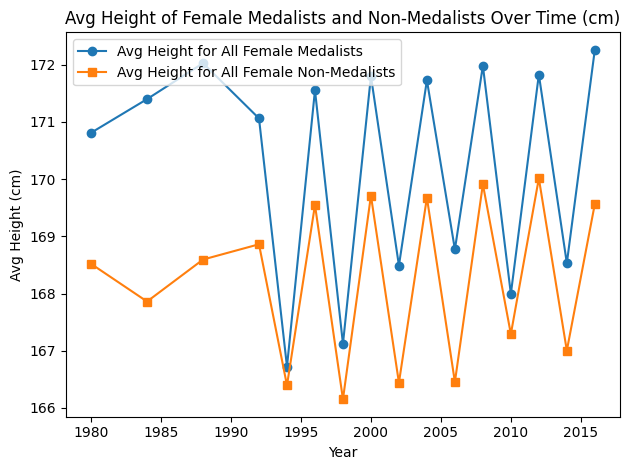

In [118]:
af_yearly_avg_height_medalist = af_medalists.groupby('Year')['Height'].mean().reset_index()
af_yearly_avg_height_non_medalist = af_non_medalists.groupby('Year')['Height'].mean().reset_index()

plt.plot(af_yearly_avg_height_medalist['Year'], af_yearly_avg_height_medalist['Height'], label = 'Avg Height for All Female Medalists', marker = 'o')
plt.plot(af_yearly_avg_height_non_medalist['Year'], af_yearly_avg_height_non_medalist['Height'], label = 'Avg Height for All Female Non-Medalists', marker = 's')

plt.title("Avg Height of Female Medalists and Non-Medalists Over Time (cm)")
plt.xlabel('Year')
plt.ylabel('Avg Height (cm)')
plt.tight_layout()
plt.legend()
plt.show()

In [119]:
af_grouped_weight = female_df.groupby('Medalist')[['Weight']].describe()
af_grouped_weight

Weight                                                     
            count       mean        std   min   25%   50%   75%    max
Medalist                                                              
0         32688.0  61.272883  10.463382  25.0  55.0  60.0  67.0  167.0
1          7620.0  64.047638  10.940815  28.0  57.0  63.0  70.0  167.0

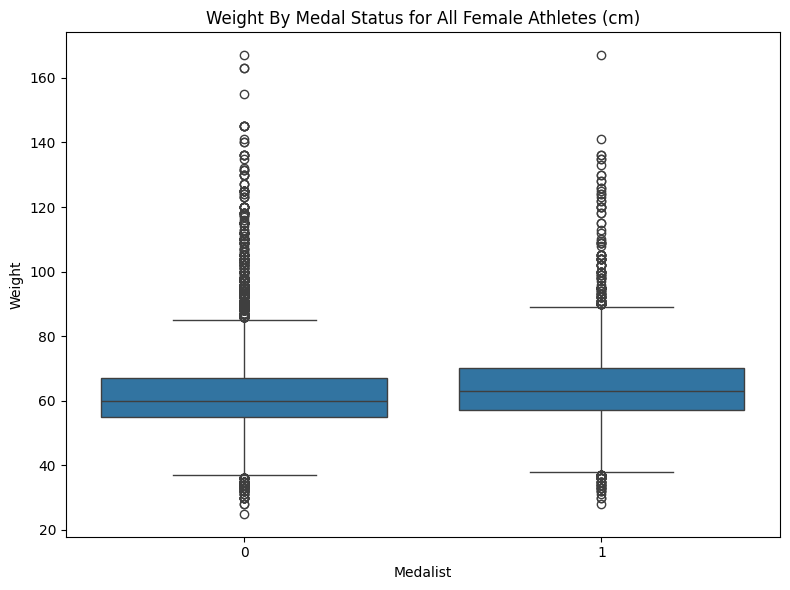

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y='Weight', data=female_df)
plt.title("Weight By Medal Status for All Female Athletes (cm)")
plt.tight_layout()
plt.show()

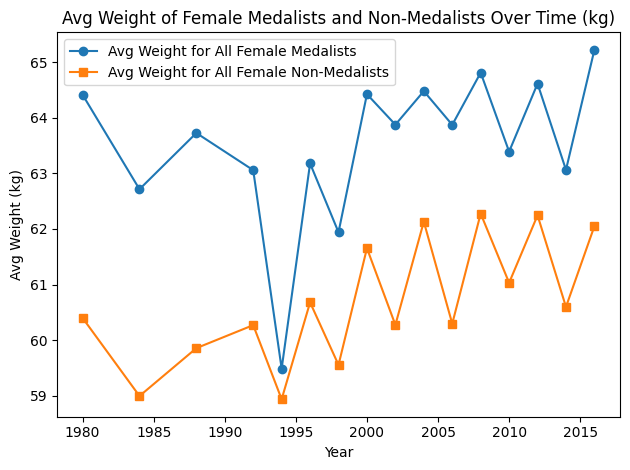

In [121]:
af_yearly_avg_weight_medalist = af_medalists.groupby('Year')['Weight'].mean().reset_index()
af_yearly_avg_weight_non_medalist = af_non_medalists.groupby('Year')['Weight'].mean().reset_index()

plt.plot(af_yearly_avg_weight_medalist['Year'], af_yearly_avg_weight_medalist['Weight'], label = 'Avg Weight for All Female Medalists', marker = 'o')
plt.plot(af_yearly_avg_weight_non_medalist['Year'], af_yearly_avg_weight_non_medalist['Weight'], label = 'Avg Weight for All Female Non-Medalists', marker = 's')

plt.title("Avg Weight of Female Medalists and Non-Medalists Over Time (kg)")
plt.xlabel('Year')
plt.ylabel('Avg Weight (kg)')
plt.tight_layout()
plt.legend()
plt.show()

In [133]:
af_grouped_age = female_df.groupby('Medalist')[['Age']].describe()
af_grouped_age

Age                                                   
            count       mean       std   min   25%   50%   75%   max
Medalist                                                            
0         32688.0  24.805525  5.416760  12.0  21.0  24.0  28.0  63.0
1          7620.0  25.177165  4.947829  13.0  22.0  25.0  28.0  52.0

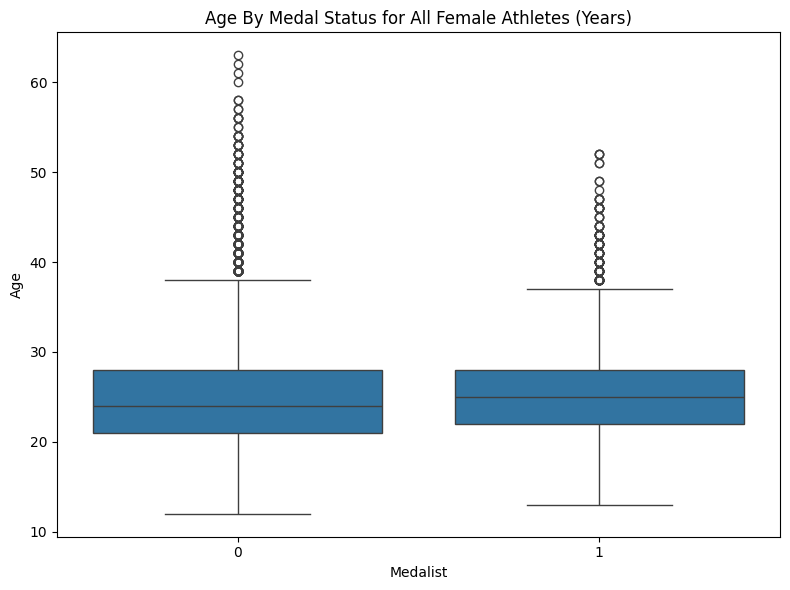

In [134]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Medalist', y= 'Age', data = female_df)
plt.title("Age By Medal Status for All Female Athletes (Years)")
plt.tight_layout()
plt.show()

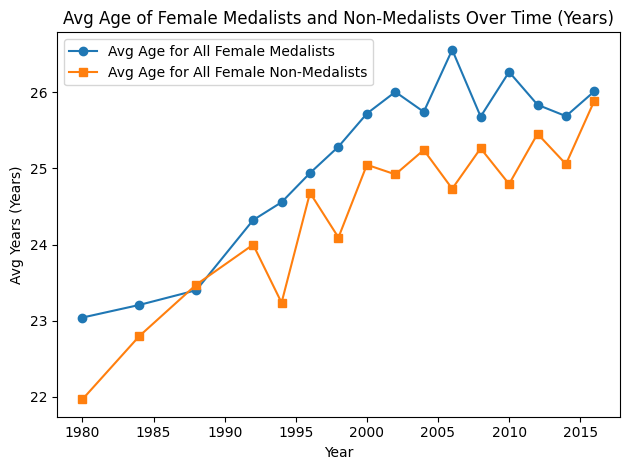

In [135]:
af_yearly_avg_age_medalist = af_medalists.groupby('Year')['Age'].mean().reset_index()
af_yearly_avg_age_non_medalist = af_non_medalists.groupby('Year')['Age'].mean().reset_index()

plt.plot(af_yearly_avg_age_medalist['Year'], af_yearly_avg_age_medalist['Age'], label = 'Avg Age for All Female Medalists', marker = 'o')
plt.plot(af_yearly_avg_age_non_medalist['Year'], af_yearly_avg_age_non_medalist['Age'], label = 'Avg Age for All Female Non-Medalists', marker = 's')

plt.title("Avg Age of Female Medalists and Non-Medalists Over Time (Years)")
plt.xlabel('Year')
plt.ylabel('Avg Years (Years)')
plt.tight_layout()
plt.legend()
plt.show()

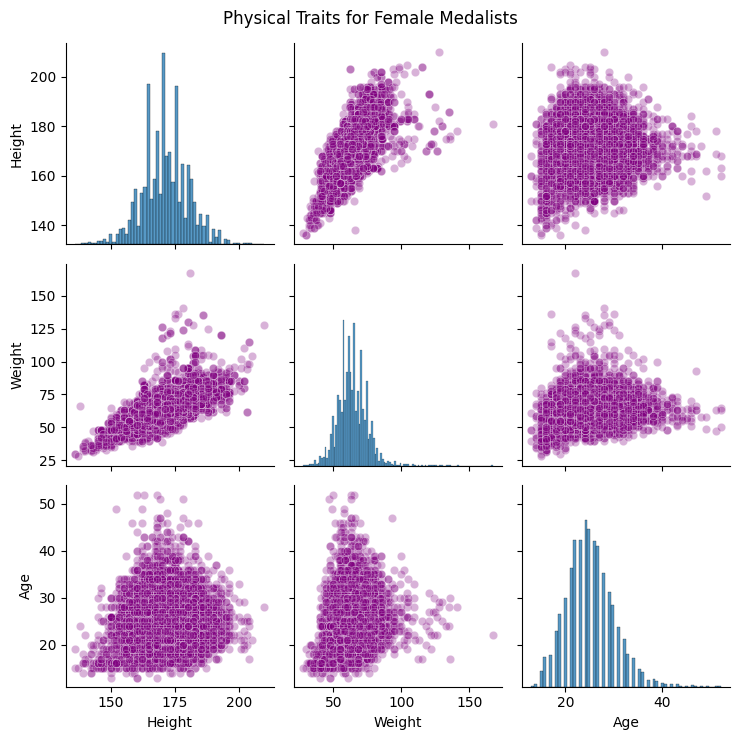

In [136]:
sns.pairplot(af_medalists[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Female Medalists")
plt.tight_layout()
plt.show()

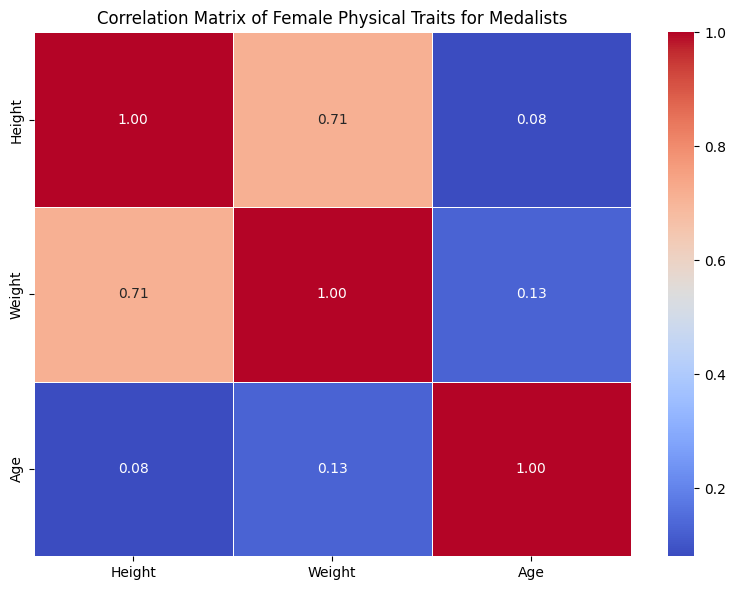

In [137]:
af_traits = af_medalists[['Height', 'Weight', 'Age']]
corr_matrix = af_traits.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Female Physical Traits for Medalists")
plt.tight_layout()
plt.show()

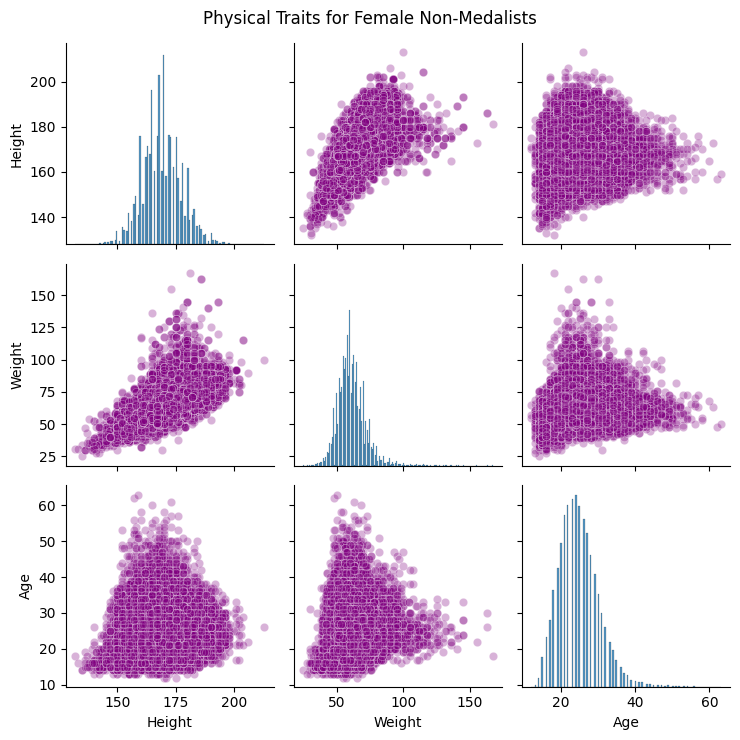

In [138]:
sns.pairplot(af_non_medalists[['Height', 'Weight', 'Age']], diag_kind='hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Female Non-Medalists")
plt.tight_layout()
plt.show()

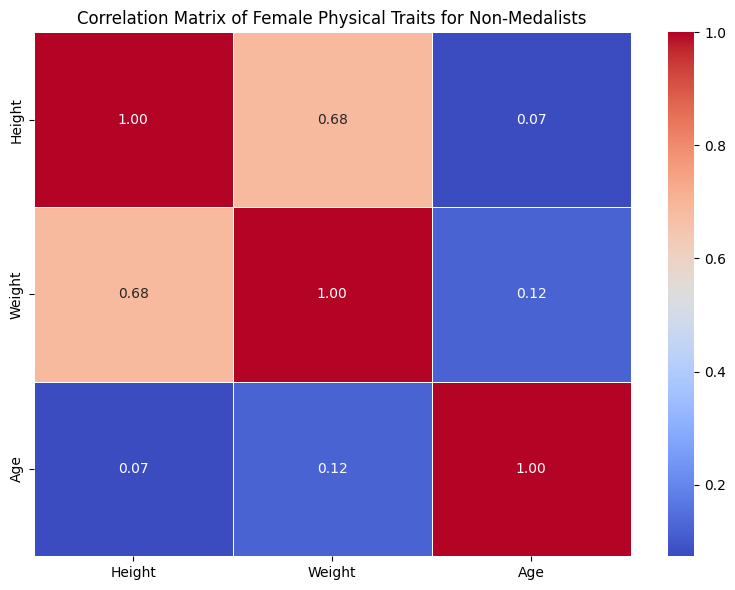

In [139]:
af_traits2 = af_non_medalists[['Height', 'Weight', 'Age']]
corr_matrix = af_traits2.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Female Physical Traits for Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Predictions

In [140]:
af_features = female_df[['Height', 'Age', 'Weight']]
af_label = female_df['Medalist']

In [141]:
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(af_features, af_label, test_size=0.2, random_state=42)

In [142]:
std_scaler = StandardScaler()
X_train_af_std = std_scaler.fit_transform(X_train_af)
X_test_af_std = std_scaler.transform(X_test_af)

In [143]:
norm_scaler = MinMaxScaler()
X_train_af_norm = norm_scaler.fit_transform(X_train_af)
X_test_af_norm = norm_scaler.transform(X_test_af)

### Unscaled Data Test

In [144]:
model_unscaled_af = KNeighborsClassifier(n_neighbors=5)
model_unscaled_af.fit(X_train_af, y_train_af)
pred_unscaled_af = model_unscaled_af.predict(X_test_af)
print(accuracy_score(y_test_af, pred_unscaled_af))

0.7774745720664847


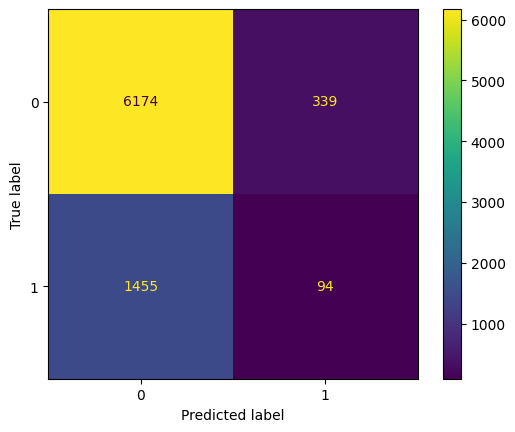

In [145]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_af, pred_unscaled_af, display_labels=model_unscaled_af.classes_)
plt.show()

/tmp/ipython-input-146-2638711754.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


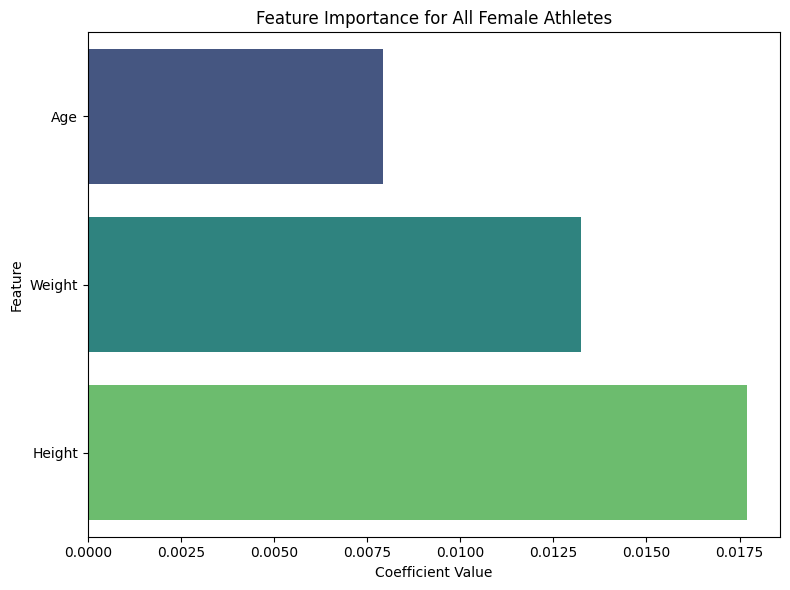

In [146]:
af_model = LogisticRegression(max_iter=1000)
af_model.fit(X_train_af, y_train_af)

coeffs = af_model.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_af.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Female Athletes")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Standardized Data Test

In [147]:
model_std_af = KNeighborsClassifier(n_neighbors=5)
model_std_af.fit(X_train_af_std, y_train_af)
pred_std_af = model_std_af.predict(X_test_af_std)
print(accuracy_score(y_test_af, pred_std_af))

0.7782188042669312


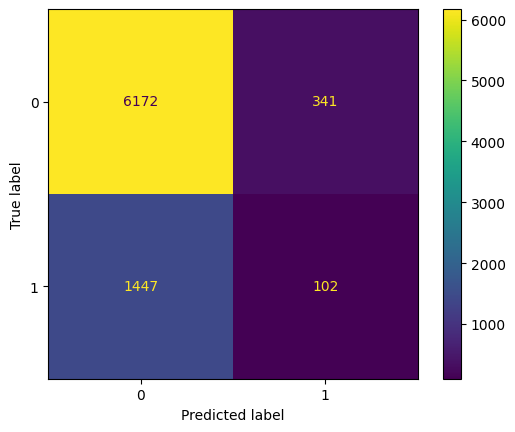

In [149]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_af, pred_std_af, display_labels=model_std_af.classes_)
plt.show()

/tmp/ipython-input-150-1682609158.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y= feature_importance.index, palette='viridis')


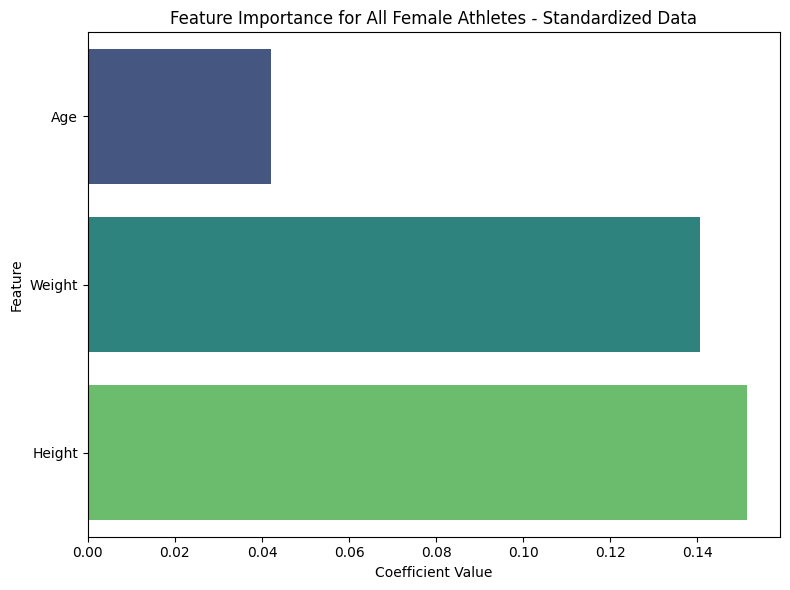

In [150]:
af_model2 = LogisticRegression(max_iter=1000)
af_model2.fit(X_train_af_std, y_train_af)

coeffs = af_model2.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_af.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y= feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Female Athletes - Standardized Data")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Normalized Data Test

In [151]:
model_norm_af = KNeighborsClassifier(n_neighbors=5)
model_norm_af.fit(X_train_af_norm, y_train_af)
pred_norm_af = model_norm_af.predict(X_test_af_norm)
print(accuracy_score(y_test_af, pred_norm_af))

0.7782188042669312


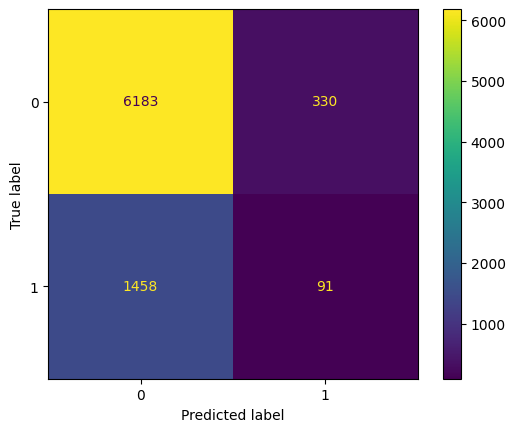

In [153]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_af, pred_norm_af, display_labels=model_norm_af.classes_)
plt.show()

/tmp/ipython-input-152-3073879755.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y= feature_importance.index, palette='viridis')


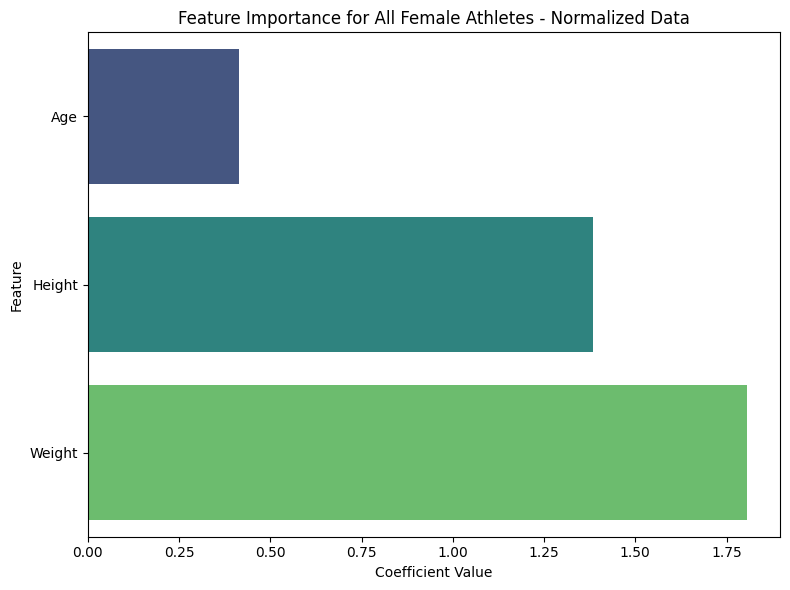

In [152]:
af_model3 = LogisticRegression(max_iter=1000)
af_model3.fit(X_train_af_norm, y_train_af)

coeffs = af_model3.coef_[0]
feature_importance = pd.Series(coeffs, index=X_train_af.columns.tolist()).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y= feature_importance.index, palette='viridis')
plt.title("Feature Importance for All Female Athletes - Normalized Data")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

###Analysis

## **Winter Season**

In [155]:
female_winter_df = all_df[all_df['Season Encoded'] == 0]
female_winter_df = female_winter_df[female_winter_df['Sex'] == 'F']
female_winter_df.reset_index(drop=True, inplace=True)
female_winter_df.head()

ID Sex   Age  Height  Weight  Year          Sport  Medalist  Season Encoded
0   5   F  21.0   185.0    82.0  1988  Speed Skating         0               0
1   5   F  25.0   185.0    82.0  1992  Speed Skating         0               0
2   5   F  27.0   185.0    82.0  1994  Speed Skating         0               0
3  14   F  32.0   171.0    65.0  1994       Biathlon         0               0
4  26   F  17.0   169.0    65.0  1984           Luge         0               0

### Visualizations

In [ ]:
fw_medalists_df = female_winter_df[female_winter_df['Medalist'] == 1]
fw_non_medalists_df = female_winter_df[female_winter_df['Medalist'] == 0]

In [ ]:
fw_grouped_height = female_winter_df.groupby('Medalist')[['Height']].describe()
fw_grouped_height

In [ ]:
fw_grouped_weight = female_winter_df.groupby('Medalist')[['Weight']].describe()
fw_grouped_weight

In [ ]:
fw_grouped_age = female_winter_df.groupby('Medalist')[['Age']].describe()
fw_grouped_age

In [ ]:
sns.pairplot(fw_medalists_df[['Height', 'Weight', 'Age']], diag_kind='hist',plot_kws={'alpha': 0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Female Winter Season Medalists", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns for correlation
fw_traits = fw_medalists_df[['Height', 'Weight', 'Age']]

# Compute correlation matrix
corr_matrix = fw_traits.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Female Physical Traits for Winter Medalists")
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(fw_non_medalists_df[['Height', 'Weight', 'Age']], diag_kind = 'hist', plot_kws={'alpha':0.3, 'color': 'purple'})
plt.suptitle("Physical Traits for Female Winter Season Non-Medalists")
plt.tight_layout()
plt.show()

In [ ]:
# Select numercial columns
fw_traits2 = fw_non_medalists_df[['Height', 'Weight', 'Age']]

# Compute Correlation Matrix
corr_matrix = fw_traits2.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title("Correlation Matrix of Female Physical Traits for Winter Non-Medalists")
plt.tight_layout()
plt.show()

### Feature Prep & Predictions

In [ ]:
fw_features = female_winter_df[['Height', 'Age', 'Weight']]
fw_label = female_winter_df['Medalist']

In [ ]:
X_train_fw, X_test_fw, y_train_fw, y_test_fw = train_test_split(fw_features, fw_label, test_size=0.2, random_state=42)

In [ ]:
# Standardized Training Data
std_scaler = StandardScaler()
X_train_fw_std = std_scaler.fit_transform(X_train_fw)
X_test_fw_std = std_scaler.transform(X_test_fw)

In [ ]:
# Normalized Training Data
norm_scaler = MinMaxScaler()
X_train_fw_norm = norm_scaler.fit_transform(X_train_fw)
X_test_fw_norm = norm_scaler.transform(X_test_fw)

### Unscaled Data Test

In [ ]:
model_unscaled_fw = KNeighborsClassifier(n_neighbors = 5)
model_unscaled_fw.fit(X_train_fw, y_train_fw)
pred_unscaled_fw = model_unscaled_fw.predict(X_test_fw)
print(accuracy_score(y_test_fw, pred_unscaled_fw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_fw, pred_unscaled_fw, display_labels = model_unscaled_fw.classes_)
plt.show()

### Standardized Data Test

In [ ]:
model_std_fw = KNeighborsClassifier(n_neighbors = 5)
model_std_fw.fit(X_train_fw_std, y_train_fw)
pred_std_fw = model_std_fw.predict(X_test_fw_std)
print(accuracy_score(y_test_fw, pred_std_fw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_fw, pred_std_fw, display_labels=model_std_fw.classes_)
plt.show()

### Normalized Data Test

In [ ]:
model_norm_fw = KNeighborsClassifier(n_neighbors = 5)
model_norm_fw.fit(X_train_fw_norm, y_train_fw)
pred_norm_fw = model_norm_fw.predict(X_test_fw_norm)
print(accuracy_score(y_test_fw, pred_norm_fw))

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_fw, pred_norm_fw, display_labels = model_norm_fw.classes_)
plt.show()

### Analysis

## **Summer Season**

In [ ]:
female_summer_df = all_df[all_df['Season_Encoded'] == 1]
female_summer_df = female_summer_df[female_summer_df['Sex'] == 'F']
female_summer_df.reset_index(drop=True, inplace=True)
female_summer_df.head()

### Visualizations

In [ ]:
fs_grouped_height = female_summer_df.groupby('Medalist')[['Height']].describe()
fs_grouped_height

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Height', data = female_summer_df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
fs_grouped_weight = female_summer_df.groupby('Medalist')[['Weight']].describe()
fs_grouped_weight

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Weight', data= female_summer_df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
fs_grouped_age = female_summer_df.groupby('Medalist')[['Age']].describe()
fs_grouped_age

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Medalist', y='Age', data = female_summer_df)
plt.xticks(rotation  = 90)
plt.show()

### Feature Prep & Predictions

In [ ]:
fs_features = female_summer_df[['Height', 'Age', 'Weight']]
fs_label = female_summer_df['Medalist']

### Unscaled Data Test

### Standardized Data Test

### Normalized Data Test

### Analysis